# 16S analysis pipeline 

## Version and History

This pipeline by Hannah Greenwald was created to produce figures and results for pre-processed 16S data based on a pipeline previously developed by Rose Kantor. This is the third and final pipeline for processing amplicon sequencing data.

Anyone seeking to use this code will need to change the directories and place files in the proper directory with the data.

# Load libraries and data

In [1]:
# BiocManager::install("microbiome")
# BiocManager::install("VennDiagram")
# BiocManager::install("svglite")
# install_github("vqv/ggbiplot")
# devtools::install_github("adw96/breakaway")
# devtools::install_github("adw96/DivNet")

In [2]:
library('devtools')
library(ggbiplot)
library(phyloseq); packageVersion("phyloseq")
library(dada2)
library(ggplot2); packageVersion("ggplot2")
library(tidyr)
library(dplyr)
library(vegan); packageVersion("vegan")
library(scales)
library(repr)
library(reshape2)
library(genefilter)
library(microbiome)
library(VennDiagram)
library(svglite)
#library(gridExtra)
library(DESeq2); packageVersion("DESeq2")
library(breakaway)
library(DivNet)

library("FactoMineR")
library("factoextra")
library('tidyverse')
library("grid")

library("forcats")
library("ggpubr")

options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

#colorblind color vector for taxonomy plots
colors <- c("#89C5DA", "#DA5724", "#74D944", "#CE50CA", "#3F4921", "#C0717C", "#CBD588", "#5F7FC7", 
            "#673770", "#D3D93E", "#38333E", "#508578", "#D7C1B1", "#689030", "#AD6F3B", "#CD9BCD", 
            "#D14285", "#6DDE88", "#652926", "#7FDCC0", "#C84248", "#8569D5", "#5E738F", "#D1A33D", 
            "#8A7C64", "#599861", "orange", "666666", "gray80", "#FFCC00", "#756bb1", "#3182bd", 
            "#fa9fb5", "#FFA500", "#BF40BF")

set.seed(100)

sessionInfo()

Loading required package: usethis

Loading required package: ggplot2

Loading required package: plyr

Loading required package: scales

Loading required package: grid



[1] ‘1.38.0’

Loading required package: Rcpp



[1] ‘3.3.6’


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: permute


Attaching package: ‘permute’


The following object is masked from ‘package:devtools’:

    check


Loading required package: lattice

This is vegan 2.5-7



[1] ‘2.5.7’


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2021 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:scales’:

    alpha


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Loading required package: futile.logger

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, a

[1] ‘1.34.0’

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha()      masks scales::alpha(), ggplot2::alpha()
✖ dplyr::arrange()         masks plyr::arrange()
✖ readr::col_factor()      masks scales::col_factor()
✖ IRanges::collapse()      masks dplyr::collapse()
✖ Biobase::combine()       masks BiocGenerics::combine(), dplyr::combine()
✖ purrr::compact()         masks plyr::compact()
✖ matrixStats::count()     masks dplyr::count(), plyr::count()
✖ IRanges::desc()          masks dplyr::desc(), plyr::desc()
✖ purrr::discard()         masks scales::discard()
✖ S4Vectors::expand()      masks tidyr::expand()
✖ dplyr::failwith()        masks plyr::failwith()
✖ dplyr::filter()          masks sta

R version 4.1.3 (2022-03-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur/Monterey 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggpubr_0.4.0                forcats_0.5.1              
 [3] stringr_1.4.0               purrr_0.3.4                
 [5] readr_2.1.2                 tibble_3.1.7               
 [7] tidyverse_1.3.1             factoextra_1.0.7           
 [9] FactoMineR_2.4              DivNet_0.4.0               
[11] breakaway_4.7.6             DESeq2_1.34.0              
[13] SummarizedExperiment_1.24.0 Biobase_2.54.0             
[15] MatrixGenerics_1.6.0        matrix

In [3]:
# set location to save plots 
fig_dir <- '/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/Stagnation/stag_figures/'

In [4]:
#load in data
ps <- readRDS("./ps_clean_filt.rds")
ps


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2335 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 120 sample variables ]
tax_table()   Taxonomy Table:    [ 2335 taxa by 7 taxonomic ranks ]

In [5]:
#swap out metadata for updated sheet
metadata_complete <- read.table('./stagnation_final.tsv', sep="\t", header=TRUE, row.names=1)
sample_data(ps) <- metadata_complete
ps


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2335 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 119 sample variables ]
tax_table()   Taxonomy Table:    [ 2335 taxa by 7 taxonomic ranks ]

In [6]:
#create a new column for fixture type with better grouping (hot/mixed sink, cold sink, lab/industrial sink, shower, fountain)
sample_data(ps) <- sample_data(ps) %>% add_column(fixture_type = NA)
sample_data(ps)$fixture_type<- sample_data(ps)$type
sample_data(ps)$fixture_type[(sample_data(ps)$fixture_type == "bathroom" | sample_data(ps)$fixture_type == "kitchen") & (sample_data(ps)$hot_or_cold == "hot/mixed")] <- "hot/mixed faucet"
sample_data(ps)$fixture_type[(sample_data(ps)$fixture_type == "bathroom" | sample_data(ps)$fixture_type == "kitchen") & (sample_data(ps)$hot_or_cold == "cold")] <- "cold faucet"
sample_data(ps)$fixture_type[sample_data(ps)$tap_code == "SB1BC"] <- "cold faucet"

sample_data(ps) <- sample_data(ps) %>% add_column(fixture = NA)
sample_data(ps)$fixture<- sample_data(ps)$fixture_type
sample_data(ps)$fixture[(sample_data(ps)$fixture == "lab" | sample_data(ps)$fixture == "hot/mixed faucet") | (sample_data(ps)$fixture == "cold faucet")] <- "faucet"

unique(sample_data(ps)$fixture)

[1] "fountain" "shower"   "faucet"   "main"

In [7]:
#create column for groups of dates before and after the first full building flush event (6/4)
sample_data(ps)$before_after <- NA #create column for the dates before 6/4 flush and after 6/4 flush
sample_data(ps)$before_after[sample_data(ps)$date_cat == "5/14_pre" | sample_data(ps)$date_cat == "5/21_pre"|sample_data(ps)$date_cat == "6/4_pre"] <- "before"
sample_data(ps)$before_after[sample_data(ps)$date_cat == "6/4_post" | sample_data(ps)$date_cat == "6/5_pre"| sample_data(ps)$date_cat == "6/11_pre"| sample_data(ps)$date_cat == "6/11_post"| sample_data(ps)$date_cat == "6/12_pre"| sample_data(ps)$date_cat == "7/14_pre"] <- "after"


In [8]:
#change tap codes to more intuitive/consistent names

sample_data(ps)$tap_code[sample_data(ps)$tap_code == "D119"] <- "D1L"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "D434"] <- "D4L"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "D5B"] <- "D5H"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "D641"] <- "D6L"

sample_data(ps)$tap_code[sample_data(ps)$tap_code == "SB1BC"] <- "S1C"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "SB7BC"] <- "S7C"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "SB8BC"] <- "S8C"

sample_data(ps)$tap_code[sample_data(ps)$tap_code == "SB1W"] <- "S1W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "SB2W"] <- "S2W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code =="SB3W"] <- "S3W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "SB4W"] <- "S4W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code =="SB5W"] <- "S5W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "SB6W"] <- "S6W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "SB7W"] <- "S7W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "SB8W"] <- "S8W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code =="SBGF"] <- "S0F"

sample_data(ps)$tap_code[sample_data(ps)$tap_code == "BC1F"] <- "B1F"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "BC1W"] <- "B1W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "BC2W"] <- "B2W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "BC3F"] <- "B3F"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "BC3W"] <- "B3W"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "BC4F"] <- "B4F"
sample_data(ps)$tap_code[sample_data(ps)$tap_code == "BC4W"] <- "B4W"


In [9]:
#change ASV names to short codes, store DNA seqs in ref_seq object in phyloseq
dna <- Biostrings::DNAStringSet(taxa_names(ps))
names(dna) <- taxa_names(ps)
ps <- merge_phyloseq(ps, dna)
taxa_names(ps) <- paste0("ASV", seq(ntaxa(ps)))
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2335 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 122 sample variables ]
tax_table()   Taxonomy Table:    [ 2335 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 2335 reference sequences ]

In [10]:
#save the RDS file
saveRDS(ps, "~/Documents/Documents/Berkeley_Research/Stagnation/16S_analysis_2022/ps_clean_filt_metadata.rds")


In [11]:
# select only samples of interest
ps <- filter_taxa(ps, function(x) sum(x) > 0, TRUE) #keep only seqs that had reads
                 

In [12]:
#add column for formal date names
sample_data(ps) <- sample_data(ps) %>% add_column(date_formal = NA)
sample_data(ps)$date_formal[(sample_data(ps)$date_cat == "5/14_pre")] <- "May 14 First-Draw"
sample_data(ps)$date_formal[(sample_data(ps)$date_cat == "5/21_pre")] <- "May 21 First-Draw"
sample_data(ps)$date_formal[(sample_data(ps)$date_cat == "6/4_pre")] <- "June 4 First-Draw"
sample_data(ps)$date_formal[(sample_data(ps)$date_cat == "6/4_post")] <- "June 4 Post-Flush"
sample_data(ps)$date_formal[(sample_data(ps)$date_cat == "6/5_pre")] <- "June 5 Day-after-Flush"
sample_data(ps)$date_formal[(sample_data(ps)$date_cat == "6/11_pre")] <- "June 11 First-Draw"
sample_data(ps)$date_formal[(sample_data(ps)$date_cat == "6/12_pre")] <- "June 12 Day-after-Flush"
sample_data(ps)$date_formal[(sample_data(ps)$date_cat == "6/23_pre")] <- "June 23 First-Draw"
sample_data(ps)$date_formal[(sample_data(ps)$date_cat == "7/14_pre")] <- "July 14 First-Draw"


In [13]:
#substitute metals that were below the detection limit
sample_data(ps)$Pb[(sample_data(ps)$date_cat == "5/14_pre") & (sample_data(ps)$Pb < (4.176*5)) ] <- (4.176*5)/sqrt(2)    
sample_data(ps)$Pb[(sample_data(ps)$date_cat == "5/21_pre") & (sample_data(ps)$Pb < (3.434*5)) ] <- (3.434*5)/sqrt(2)   
sample_data(ps)$Pb[(sample_data(ps)$date_cat == "6/4_pre" | sample_data(ps)$date_cat == "6/4_post" | sample_data(ps)$date_cat == "6/5_pre" | sample_data(ps)$date_cat == "6/11_pre" | sample_data(ps)$date_cat == "6/12_pre") & (sample_data(ps)$Pb < (3.357*5)) ] <- (3.357*5)/sqrt(2)   
sample_data(ps)$Pb[(sample_data(ps)$date_cat == "6/23_pre" | sample_data(ps)$date_cat == "7/14_pre") & (sample_data(ps)$Pb < (4.165*5)) ] <- (4.165*5)/sqrt(2)   

sample_data(ps)$Cu[(sample_data(ps)$date_cat == "5/14_pre") & (sample_data(ps)$Cu < (2.578*5)) ] <- (2.578*5)/sqrt(2)    
sample_data(ps)$Cu[(sample_data(ps)$date_cat == "5/21_pre") & (sample_data(ps)$Cu < (3.43*5)) ] <- (3.43*5)/sqrt(2)   
sample_data(ps)$Cu[(sample_data(ps)$date_cat == "6/4_pre" | sample_data(ps)$date_cat == "6/4_post" | sample_data(ps)$date_cat == "6/5_pre" | sample_data(ps)$date_cat == "6/11_pre" | sample_data(ps)$date_cat == "6/12_pre") & (sample_data(ps)$Cu < (3.72*5)) ] <- (3.72*5)/sqrt(2)   
sample_data(ps)$Cu[(sample_data(ps)$date_cat == "6/23_pre" | sample_data(ps)$date_cat == "7/14_pre") & (sample_data(ps)$Cu < (3.95*5)) ] <- (3.95*5)/sqrt(2)   
    
sample_data(ps)$Fe[(sample_data(ps)$date_cat == "5/14_pre") & (sample_data(ps)$Fe < (1.01*5)) ] <- (1.01*5)/sqrt(2)    
sample_data(ps)$Fe[(sample_data(ps)$date_cat == "5/21_pre") & (sample_data(ps)$Fe < (1.36*5)) ] <- (1.36*5)/sqrt(2)   
sample_data(ps)$Fe[(sample_data(ps)$date_cat == "6/4_pre" | sample_data(ps)$date_cat == "6/4_post" | sample_data(ps)$date_cat == "6/5_pre" | sample_data(ps)$date_cat == "6/11_pre" | sample_data(ps)$date_cat == "6/12_pre") & (sample_data(ps)$Fe < (3.89*5)) ] <- (3.89*5)/sqrt(2)   
sample_data(ps)$Fe[(sample_data(ps)$date_cat == "6/23_pre" | sample_data(ps)$date_cat == "7/14_pre") & (sample_data(ps)$Fe < (3.44*5)) ] <- (3.44*5)/sqrt(2)   

sample_data(ps)$Mn[(sample_data(ps)$date_cat == "5/14_pre") & (sample_data(ps)$Mn < (0.82*5)) ] <- (0.82*5)/sqrt(2)    
sample_data(ps)$Mn[(sample_data(ps)$date_cat == "5/21_pre") & (sample_data(ps)$Mn < (0.47*5)) ] <- (0.47*5)/sqrt(2)   
sample_data(ps)$Mn[(sample_data(ps)$date_cat == "6/4_pre" | sample_data(ps)$date_cat == "6/4_post" | sample_data(ps)$date_cat == "6/5_pre" | sample_data(ps)$date_cat == "6/11_pre" | sample_data(ps)$date_cat == "6/12_pre") & (sample_data(ps)$Mn < (0.679*5)) ] <- (0.679*5)/sqrt(2)   
sample_data(ps)$Mn[(sample_data(ps)$date_cat == "6/23_pre" | sample_data(ps)$date_cat == "7/14_pre") & (sample_data(ps)$Mn < (1.33*5)) ] <- (1.33*5)/sqrt(2)   

sample_data(ps)$Zn[(sample_data(ps)$date_cat == "5/14_pre") & (sample_data(ps)$Zn < (2.675*5)) ] <- (2.675*5)/sqrt(2)    
sample_data(ps)$Zn[(sample_data(ps)$date_cat == "5/21_pre") & (sample_data(ps)$Zn < (1.474*5)) ] <- (1.474*5)/sqrt(2)   
sample_data(ps)$Zn[(sample_data(ps)$date_cat == "6/4_pre" | sample_data(ps)$date_cat == "6/4_post" | sample_data(ps)$date_cat == "6/5_pre" | sample_data(ps)$date_cat == "6/11_pre" | sample_data(ps)$date_cat == "6/12_pre") & (sample_data(ps)$Zn < (1.51*5)) ] <- (1.51*5)/sqrt(2)   
sample_data(ps)$Zn[(sample_data(ps)$date_cat == "6/23_pre" | sample_data(ps)$date_cat == "7/14_pre") & (sample_data(ps)$Zn < (13.69*5)) ] <- (13.69*5)/sqrt(2)   
  

In [14]:
#make flush and building columns into factors 

sample_data(ps)$building[sample_data(ps)$building == "davis"] <- "D" 
sample_data(ps)$building[sample_data(ps)$building == "SB"] <- "S" 
sample_data(ps)$building[sample_data(ps)$building == "BC"] <- "B" 
ps_nofactor <- ps 

building_levels <- c('D', 'B', 'S')
flush_levels <- c( 'pre', 'post', 'day after flush', 'main')
date_levels <- c('5/14_pre','5/21_pre','6/4_pre','6/4_post', '6/5_pre','6/11_pre','6/12_pre' ,'6/23_pre','7/14_pre')
formal_date_levels <- c("May 14 First-Draw","May 21 First-Draw", "June 4 First-Draw", "June 4 Post-Flush", "June 5 Day-after-Flush", "June 11 First-Draw", "June 12 Day-after-Flush", "June 23 First-Draw", "July 14 First-Draw")

sample_data(ps)$building <- factor(sample_data(ps)$building, order= TRUE, levels=building_levels)
sample_data(ps)$flush <- factor(sample_data(ps)$flush, order= TRUE,levels=flush_levels)
sample_data(ps)$date_cat <- factor(sample_data(ps)$date_cat, order= TRUE,levels=date_levels)
sample_data(ps)$date_formal <- factor(sample_data(ps)$date_formal, order= TRUE,levels=formal_date_levels)



In [15]:
# normalize to percents
ps_perc <- transform_sample_counts(ps, function(x) 100*x/sum(x))
ps_perc_nofactor <- transform_sample_counts(ps_nofactor, function(x) 100*x/sum(x))

In [16]:
#summarize counts
seq_summary <- sample_data(ps) %>% group_by(building, date_cat_main) %>% dplyr::summarise(n=n())
seq_summary
ps

`summarise()` has grouped output by 'building'. You can override using the
`.groups` argument.


building date_cat_main n 
1  D        5/14_pre       7
2  D        5/21_pre       8
3  D        6/11_main      1
4  D        6/11_pre       6
5  D        6/12_pre       7
6  D        6/4_post       3
7  D        6/4_pre        9
8  D        6/5_pre        6
9  D        7/14_main      1
10 D        7/14_pre       8
11 B        6/23_pre       7
12 B        7/14_pre       6
13 S        6/23_pre      11
14 S        7/14_pre      11

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2335 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 123 sample variables ]
tax_table()   Taxonomy Table:    [ 2335 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 2335 reference sequences ]

# Alpha diversity

quartz_off_screen 
                3

pdf 
  2

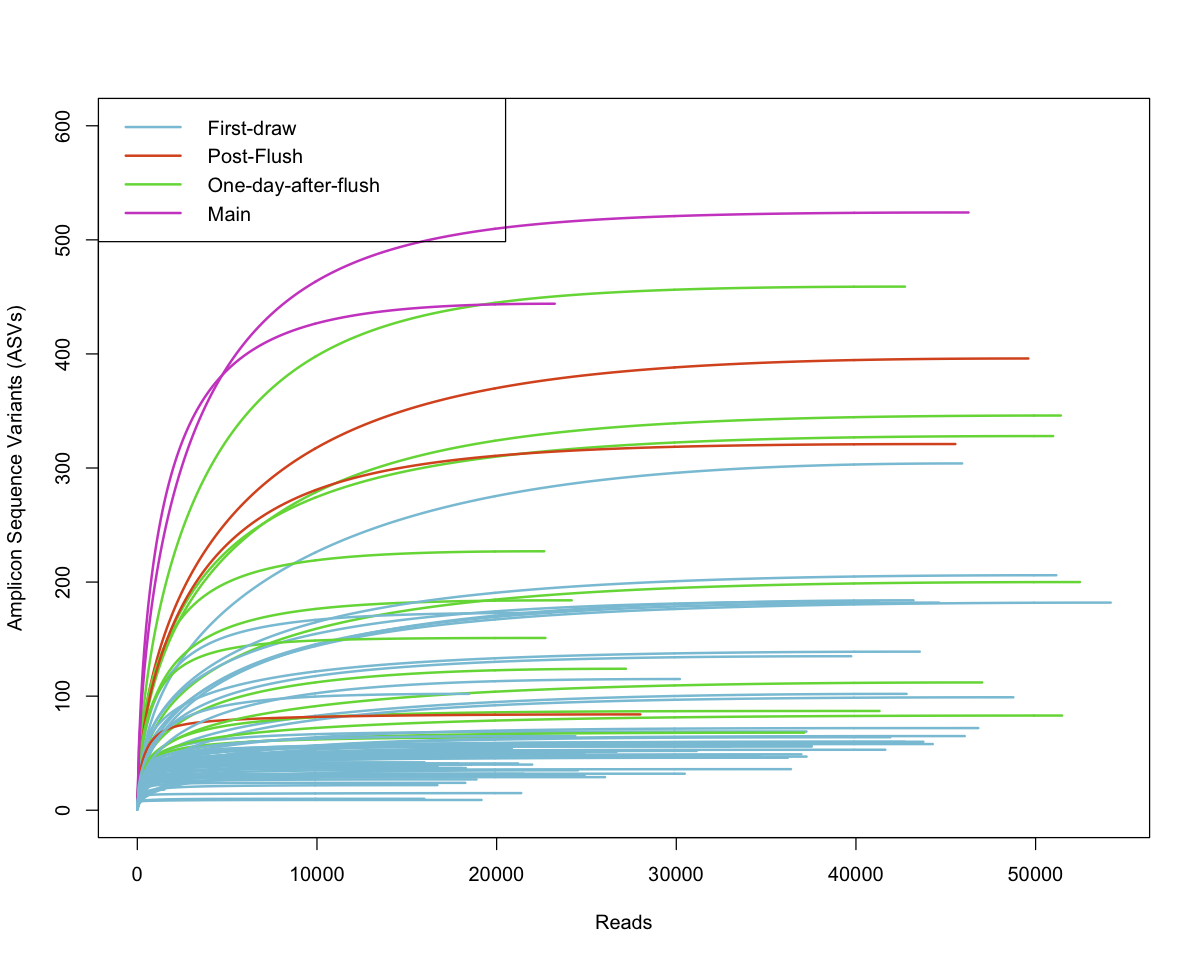

In [17]:
otu_tab <- as.data.frame(otu_table(ps))

building_colors <- c(colors[1],colors[2],colors[3],colors[4])
palette(c(colors[1],colors[2],colors[3],colors[4]))

options(repr.plot.width = 10, repr.plot.height = 8)

# pdf(paste0(fig_dir, 'rarefaction.jpeg'), height=5, width=8)
rarecurve(otu_tab, step=100, col=sample_data(ps)$flush,
          xlab="Reads", ylab="Amplicon Sequence Variants (ASVs)", lwd=2, ylim=c(0,600), label=FALSE)
legend("topleft", legend=c('First-draw', 'Post-Flush','One-day-after-flush', 'Main' ), 
       col=building_colors, 
       lty=1, lwd=2)

# ggsave(paste0(fig_dir, 'rarefaction.jpeg'), width=8, height=5)
dev.copy(jpeg,'rarefaction.jpeg')
dev.off()


Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


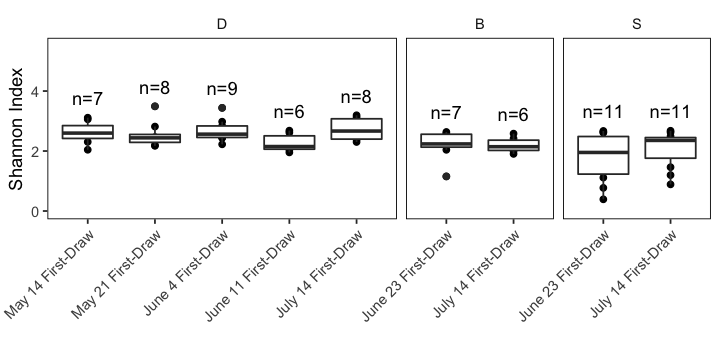

In [18]:
n_fun <- function(x){return(data.frame(y = max(x), label = paste0("n=",length(x))))}

ps_pre <- subset_samples(ps, subset= flush %in% "pre")
options(repr.plot.width = 6, repr.plot.height = 3)
plot_richness(ps_pre, x="date_formal", measures=c("Shannon"))+
    geom_boxplot()+
    xlab("")+
    theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
     strip.background = element_blank(), 
#      strip.text.x = element_blank(),
#      axis.title.x = element_blank(),
     axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))+
    ylab("Shannon Index") +
    ylim(0, 5.5)+
    #scale_y_continuous(trans="log10", limits=c(1,1800), labels=trans_format("log10", math_format(10^.x)))+
    stat_summary(fun.data = n_fun, geom = "text", vjust=-1)+
    facet_grid(.~building, scale="free_x", space="free_x")

ggsave(paste0(fig_dir, 'FigureS8.jpeg'), width=6, height=4)

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


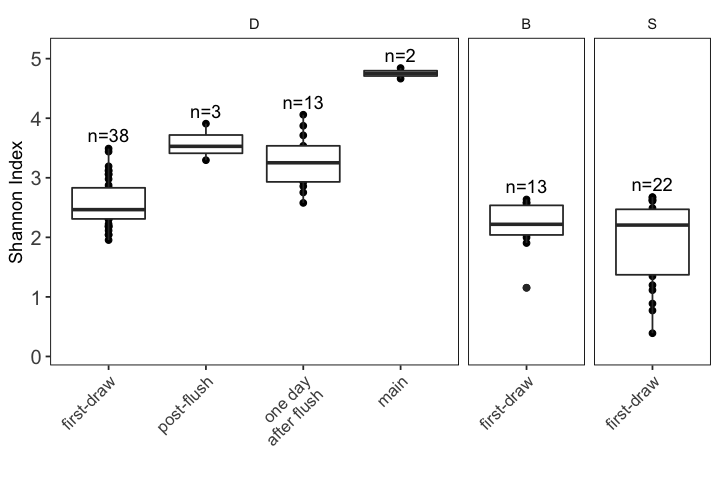

In [19]:
options(repr.plot.width = 6, repr.plot.height = 4)
shannon_plt <- plot_richness(ps, x= "flush", measure= "Shannon") + 
geom_boxplot()+
ylab("Shannon Index")+ scale_y_continuous(limits=c(0.1, 5.1))+ xlab("")+
scale_x_discrete(labels = c("first-draw", "post-flush", "one day\nafter flush", "main"))+
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
      axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=10),
      strip.background = element_blank(), 
        axis.text.y = element_text(size=12),
        legend.text=element_text(size=12), 
        legend.title=element_text(size=12))+
stat_summary(fun.data = n_fun, geom = "text", vjust=-0.5, position = position_dodge(width = 0.75))+
 facet_grid(.~building, scale="free_x", space="free_x")

shannon_plt

ggsave(paste0(fig_dir, 'Figure4.jpeg'), width=6, height=4)

In [20]:
#significance of differences in alpha diversity

sample_data(ps) <- sample_data(ps) %>% add_column(shannon = NA)
sample_data(ps)$shannon<- estimate_richness(ps,  split= TRUE, measure= "Shannon")

kruskal.test(shannon ~ flush, data = as.matrix(sample_data(ps)))

pairwise.wilcox.test(as.matrix(sample_data(ps)$shannon), as.matrix(sample_data(ps)$flush),
                 p.adjust.method = "BH")


Warning message in estimate_richness(ps, split = TRUE, measure = "Shannon"):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”



	Kruskal-Wallis rank sum test

data:  shannon by flush
Kruskal-Wallis chi-squared = 34.35, df = 3, p-value = 1.672e-07



	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  as.matrix(sample_data(ps)$shannon) and as.matrix(sample_data(ps)$flush) 

     day after flush main  post 
main 0.029           -     -    
post 0.296           0.240 -    
pre  8e-06           0.029 0.013

P value adjustment method: BH 

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”
Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


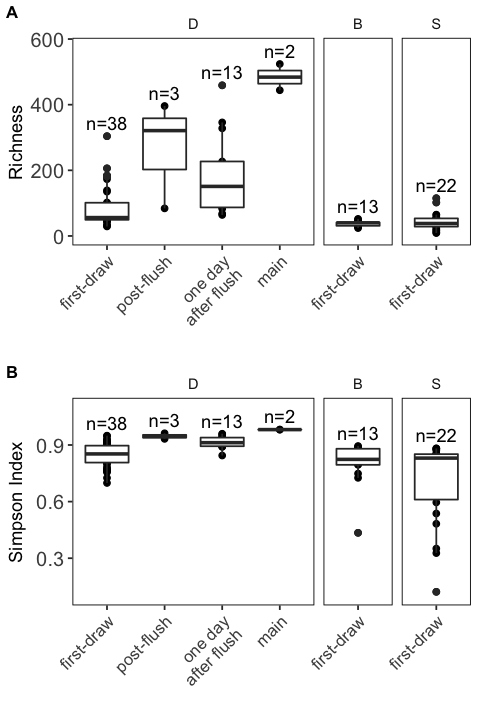

In [21]:

obs_plt <- plot_richness(ps, x= "flush", measure= "Observed") + 
geom_boxplot()+
ylab("Richness")+
xlab("")+
scale_x_discrete(labels = c("first-draw", "post-flush", "one day\nafter flush", "main"))+
scale_y_continuous(limits=c(0, 575))+
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
      axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=10),
        axis.text.y = element_text(size=12),
      strip.background = element_blank(), 
        legend.text=element_text(size=12), 
        legend.title=element_text(size=12))+
stat_summary(fun.data = n_fun, geom = "text", vjust=-0.5, position = position_dodge(width = 0.75))+
 facet_grid(.~building, scale="free_x", space="free_x")


simpson_plt <- plot_richness(ps, x= "flush", measure= "Simpson") + 
geom_boxplot()+
ylab("Simpson Index")+ xlab("")+ scale_y_continuous(limits=c(0.1, 1.1))+
scale_x_discrete(labels = c("first-draw", "post-flush", "one day\nafter flush", "main"))+
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
      axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=10),
        axis.text.y = element_text(size=12),
      strip.background = element_blank(), 
        legend.text=element_text(size=12), 
        legend.title=element_text(size=12))+
stat_summary(fun.data = n_fun, geom = "text", vjust=-0.5, position = position_dodge(width = 0.75))+
 facet_grid(.~building, scale="free_x", space="free_x")

options(repr.plot.width = 4, repr.plot.height = 6)
ggarrange(obs_plt,  simpson_plt, nrow=2, labels= c("A", "B"), font.label = list(size = 10, color = "black", face = "bold", family = NULL), legend = "right", common.legend = T, align = c("hv"))

ggsave(paste0(fig_dir, 'FigureS6.jpeg'), width=4, height=6)

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”
Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”
Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have alrea

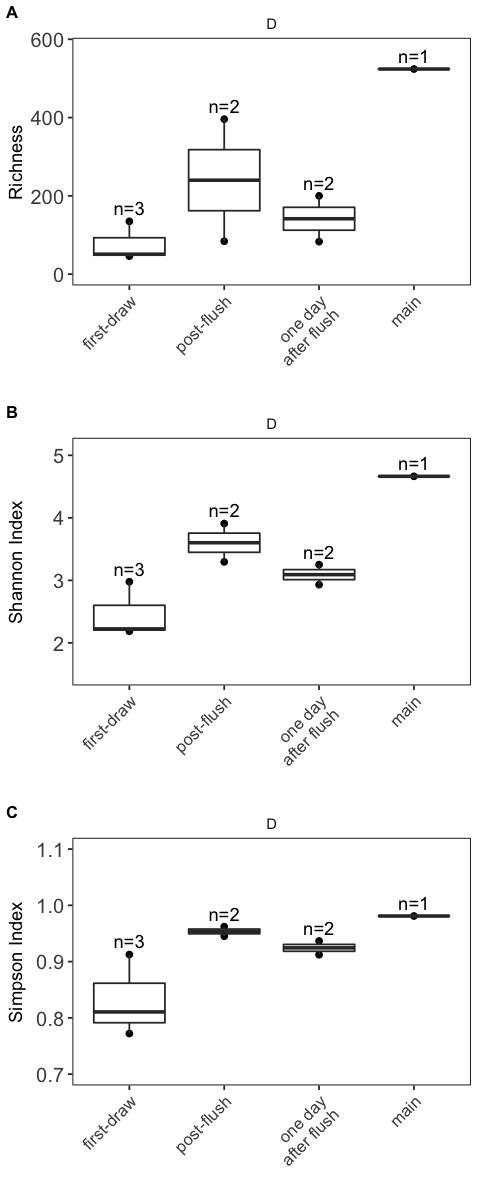

In [22]:
#only for paired samples 
ps_paired <- subset_samples(ps, subset = (sample_name %in% c("D1H_060420_pre","D1H_060420_post", "D1H_060520_pre", "D5H_060420_pre","D5H_060420_post", "D5H_060520_pre","D7H_060420_pre","D7H_060420_post", "D7H_060520_pre","D7H_061120_pre","DMain_061120_main"))) 
options(repr.plot.width = 8, repr.plot.height = 6)

obs_plt <- plot_richness(ps_paired, x= "flush", measure= "Observed") + 
geom_boxplot()+
ylab("Richness")+
xlab("")+
scale_x_discrete(labels = c("first-draw", "post-flush", "one day\nafter flush", "main"))+
scale_y_continuous(limits=c(0, 575))+
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
      axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=10),
        axis.text.y = element_text(size=12),
        legend.text=element_text(size=12), 
      strip.background = element_blank(), 
        legend.title=element_text(size=12))+
stat_summary(fun.data = n_fun, geom = "text", vjust=-0.5, position = position_dodge(width = 0.75))+
 facet_grid(.~building, scale="free_x", space="free_x")

shannon_plt <- plot_richness(ps_paired, x= "flush", measure= "Shannon") + 
geom_boxplot()+
ylab("Shannon Index")+ scale_y_continuous(limits=c(1.5, 5.1))+ xlab("")+
scale_x_discrete(labels = c("first-draw", "post-flush", "one day\nafter flush", "main"))+
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
      axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=10),
        axis.text.y = element_text(size=12),
        legend.text=element_text(size=12), 
      strip.background = element_blank(), 
        legend.title=element_text(size=12))+
stat_summary(fun.data = n_fun, geom = "text", vjust=-0.5, position = position_dodge(width = 0.75))+
 facet_grid(.~building, scale="free_x", space="free_x")

simpson_plt <- plot_richness(ps_paired, x= "flush", measure= "Simpson") + 
geom_boxplot()+
ylab("Simpson Index")+ xlab("")+ scale_y_continuous(limits=c(0.7, 1.1))+
scale_x_discrete(labels = c("first-draw", "post-flush", "one day\nafter flush", "main"))+
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
      axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=10),
        axis.text.y = element_text(size=12),
        legend.text=element_text(size=12), 
      strip.background = element_blank(), 
        legend.title=element_text(size=12))+
stat_summary(fun.data = n_fun, geom = "text", vjust=-0.5, position = position_dodge(width = 0.75))+
 facet_grid(.~building, scale="free_x", space="free_x")

options(repr.plot.width = 4, repr.plot.height = 10)
ggarrange(obs_plt, shannon_plt, simpson_plt, nrow=3, labels= c("A", "B", "C"), font.label = list(size = 10, color = "black", face = "bold", family = NULL), legend = "right", common.legend = T, align = c("hv"))

ggsave(paste0(fig_dir, 'FigureS7.jpeg'), width=4, height=10)

## What is enriched through flushing phases? DESeq2
followed guide https://bioc.ism.ac.jp/packages/2.14/bioc/vignettes/DESeq2/inst/doc/beginner.pdf

In [23]:
ps_d <- subset_samples(ps_nofactor, subset = (building %in% c("D"))) 
ps_d_flush <- subset_samples(ps_d, subset = (date_cat %in% c("6/4_pre", "6/4_post", "6/5_pre", "6/11_pre"))) 

dds = phyloseq_to_deseq2(ps_d_flush, ~ flush)

# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(dds), 1, gm_mean)
dds = estimateSizeFactors(dds, geoMeans = geoMeans)
dds = DESeq(dds, test="Wald", fitType="local")

res_full = results(dds, cooksCutoff = FALSE)
res_full = res_full[order(res_full$padj, na.last=NA), ]

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It

In [24]:
# swap out groups to test each against each other 

res<-results(dds,contrast=c("flush","pre","post")) 
res

log2 fold change (MLE): flush pre vs post 
Wald test p-value: flush pre vs post 
DataFrame with 2335 rows and 6 columns
         baseMean log2FoldChange     lfcSE       stat    pvalue      padj
        <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
ASV1     5774.417      3.0885699   2.14787  1.4379685  0.150443         1
ASV2     2042.481      2.5567376   2.18008  1.1727722  0.240887         1
ASV3      815.485     -0.8071971   1.96068 -0.4116926        NA        NA
ASV4     2487.911      0.0511589   2.01915  0.0253369  0.979786         1
ASV5      370.736     -3.7540888   2.37623 -1.5798476        NA        NA
...           ...            ...       ...        ...       ...       ...
ASV2331         0             NA        NA         NA        NA        NA
ASV2332         0             NA        NA         NA        NA        NA
ASV2333         0             NA        NA         NA        NA        NA
ASV2334         0             NA        NA         NA        NA   

In [25]:
alpha = 0.1
sum(res$padj < 0.1, na.rm= TRUE)
sigtab_full = res[!is.na(res$padj) & (res$padj < alpha),]
sigtab_full
# sigtab_full = cbind(as(sigtab_full, "data.frame"), as(tax_table(ps_d_flush)[rownames(sigtab_full), ], "matrix"))

[1] 3

log2 fold change (MLE): flush pre vs post 
Wald test p-value: flush pre vs post 
DataFrame with 3 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat      pvalue        padj
       <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
ASV82   12.88583        25.0715   4.71258   5.32013 1.03694e-07 6.47049e-05
ASV114   9.62441        21.0024   4.71609   4.45335 8.45403e-06 3.51688e-03
ASV145  22.56504        27.5459   4.71284   5.84486 5.07009e-09 6.32748e-06

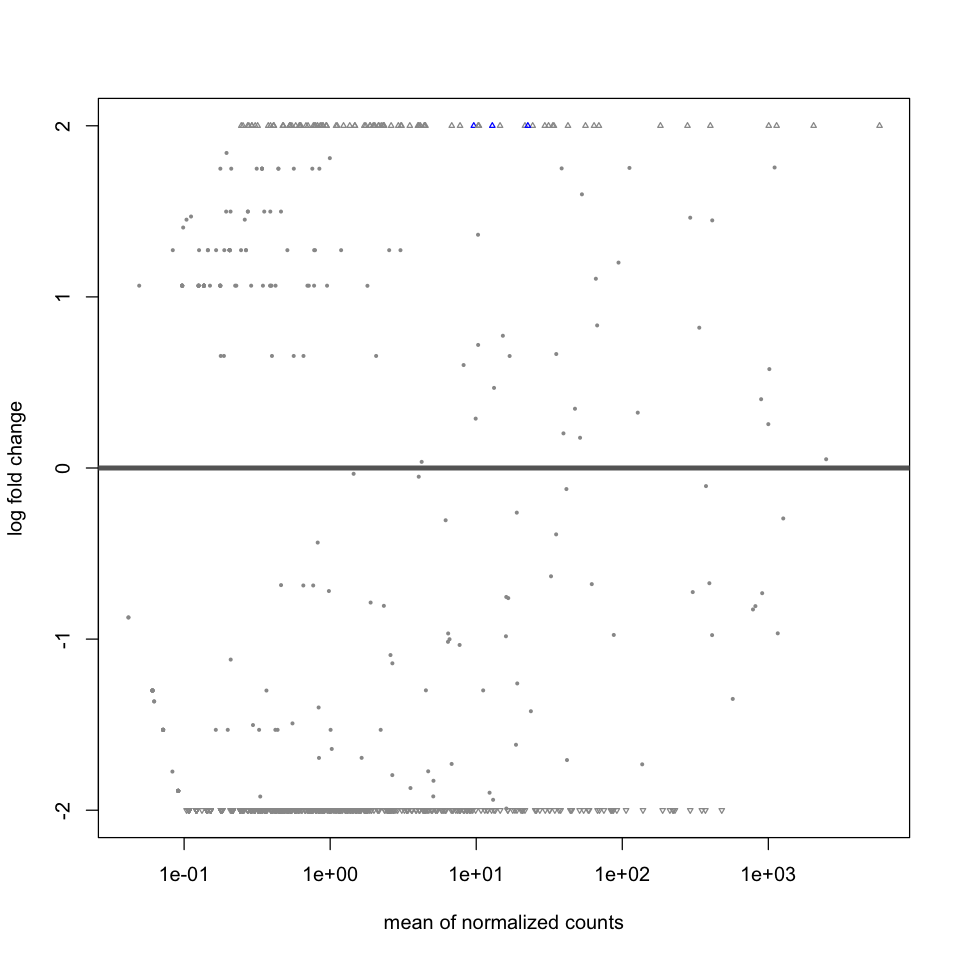

In [26]:
#plot deseq results
options(repr.plot.width = 8, repr.plot.height = 8)
plotMA(res, ylim=c(-2,2))

In [27]:
#what's enriched between groups?

#pre over post
tax_table(ps_d_flush)[82,] #reyranella significantly enriched in pre over post
tax_table(ps_d_flush)[145,] #reyranella significantly enriched in pre over post

#post over main
tax_table(ps_d_flush)[55,] #sig enriched in post over main Bacteroidota>Chitinophagaceae>UTBCD1

#enriched in pre over the main 
tax_table(ps_d_flush)[4,] #Proteobacteria>Sphingomonadaceae>Qipengyuania
tax_table(ps_d_flush)[11,] #Proteobacteria>Caulobacteraceae>Phenylobacterium
tax_table(ps_d_flush)[13,] #Bacteroidota>Chitinophagaceae>Lacibacter
tax_table(ps_d_flush)[18,] #Proteobacteria>Rhodobacteraceae>Rhodobacter
tax_table(ps_d_flush)[47,] #Proteobacteria>Methylophilaceae>Methylophilus
tax_table(ps_d_flush)[55,] #Bacteroidota>Chitinophagaceae>UTBCD1

#enriched in day after flush over post 
tax_table(ps_d_flush)[145,] #reyranella

#enriched in pre over day after flush
tax_table(ps_d_flush)[82,] #reyranella

#enriched in day after flush over main
tax_table(ps_d_flush)[4,] #Proteobacteria>Sphingomonadaceae>Qipengyuania
tax_table(ps_d_flush)[11,] #Proteobacteria>Caulobacteraceae>Phenylobacterium
tax_table(ps_d_flush)[18,] #Proteobacteria>Rhodobacteraceae>Rhodobacter
tax_table(ps_d_flush)[47,] #Proteobacteria>Methylophilaceae>Methylophilus
tax_table(ps_d_flush)[55,] #Bacteroidota>Chitinophagaceae>UTBCD1

Kingdom  Phylum         Class               Order         Family        
ASV82 Bacteria Proteobacteria Alphaproteobacteria Reyranellales Reyranellaceae
      Genus      combined                                
ASV82 Reyranella Proteobacteria>Reyranellaceae>Reyranella

Kingdom  Phylum         Class               Order         Family        
ASV145 Bacteria Proteobacteria Alphaproteobacteria Reyranellales Reyranellaceae
       Genus      combined                                
ASV145 Reyranella Proteobacteria>Reyranellaceae>Reyranella

Kingdom  Phylum       Class       Order           Family           Genus 
ASV55 Bacteria Bacteroidota Bacteroidia Chitinophagales Chitinophagaceae UTBCD1
      combined                            
ASV55 Bacteroidota>Chitinophagaceae>UTBCD1

Kingdom  Phylum         Class               Order           
ASV4 Bacteria Proteobacteria Alphaproteobacteria Sphingomonadales
     Family            Genus       
ASV4 Sphingomonadaceae Qipengyuania
     combined                                     
ASV4 Proteobacteria>Sphingomonadaceae>Qipengyuania

Kingdom  Phylum         Class               Order          
ASV11 Bacteria Proteobacteria Alphaproteobacteria Caulobacterales
      Family           Genus           
ASV11 Caulobacteraceae Phenylobacterium
      combined                                        
ASV11 Proteobacteria>Caulobacteraceae>Phenylobacterium

Kingdom  Phylum       Class       Order           Family          
ASV13 Bacteria Bacteroidota Bacteroidia Chitinophagales Chitinophagaceae
      Genus      combined                                
ASV13 Lacibacter Bacteroidota>Chitinophagaceae>Lacibacter

Kingdom  Phylum         Class               Order          
ASV18 Bacteria Proteobacteria Alphaproteobacteria Rhodobacterales
      Family           Genus       combined                                   
ASV18 Rhodobacteraceae Rhodobacter Proteobacteria>Rhodobacteraceae>Rhodobacter

Kingdom  Phylum         Class               Order          
ASV47 Bacteria Proteobacteria Gammaproteobacteria Burkholderiales
      Family           Genus        
ASV47 Methylophilaceae Methylophilus
      combined                                     
ASV47 Proteobacteria>Methylophilaceae>Methylophilus

Kingdom  Phylum       Class       Order           Family           Genus 
ASV55 Bacteria Bacteroidota Bacteroidia Chitinophagales Chitinophagaceae UTBCD1
      combined                            
ASV55 Bacteroidota>Chitinophagaceae>UTBCD1

Kingdom  Phylum         Class               Order         Family        
ASV145 Bacteria Proteobacteria Alphaproteobacteria Reyranellales Reyranellaceae
       Genus      combined                                
ASV145 Reyranella Proteobacteria>Reyranellaceae>Reyranella

Kingdom  Phylum         Class               Order         Family        
ASV82 Bacteria Proteobacteria Alphaproteobacteria Reyranellales Reyranellaceae
      Genus      combined                                
ASV82 Reyranella Proteobacteria>Reyranellaceae>Reyranella

Kingdom  Phylum         Class               Order           
ASV4 Bacteria Proteobacteria Alphaproteobacteria Sphingomonadales
     Family            Genus       
ASV4 Sphingomonadaceae Qipengyuania
     combined                                     
ASV4 Proteobacteria>Sphingomonadaceae>Qipengyuania

Kingdom  Phylum         Class               Order          
ASV11 Bacteria Proteobacteria Alphaproteobacteria Caulobacterales
      Family           Genus           
ASV11 Caulobacteraceae Phenylobacterium
      combined                                        
ASV11 Proteobacteria>Caulobacteraceae>Phenylobacterium

Kingdom  Phylum         Class               Order          
ASV18 Bacteria Proteobacteria Alphaproteobacteria Rhodobacterales
      Family           Genus       combined                                   
ASV18 Rhodobacteraceae Rhodobacter Proteobacteria>Rhodobacteraceae>Rhodobacter

Kingdom  Phylum         Class               Order          
ASV47 Bacteria Proteobacteria Gammaproteobacteria Burkholderiales
      Family           Genus        
ASV47 Methylophilaceae Methylophilus
      combined                                     
ASV47 Proteobacteria>Methylophilaceae>Methylophilus

Kingdom  Phylum       Class       Order           Family           Genus 
ASV55 Bacteria Bacteroidota Bacteroidia Chitinophagales Chitinophagaceae UTBCD1
      combined                            
ASV55 Bacteroidota>Chitinophagaceae>UTBCD1

# Taxonomic composition

In [28]:
ps_perc_filt1.3 <- filter_taxa(ps_perc, filterfun(kOverA(1, 3)), TRUE)
ps_perc_filt1.3
ps_perc_filt2.1 <- filter_taxa(ps_perc, filterfun(kOverA(2, 1)), TRUE)
ps_perc_filt2.1
ps_perc_filt1.1 <- filter_taxa(ps_perc, filterfun(kOverA(1, 1)), TRUE)
ps_perc_filt1.1

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 107 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 123 sample variables ]
tax_table()   Taxonomy Table:    [ 107 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 107 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 132 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 123 sample variables ]
tax_table()   Taxonomy Table:    [ 132 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 132 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 171 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 123 sample variables ]
tax_table()   Taxonomy Table:    [ 171 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 171 reference sequences ]

In [29]:
# by flush, by genus

mergedps <- merge_samples(ps_perc, "flush")

# Use psmelt to obtain a long-format data.frame
phy <- mergedps %>% tax_glom(taxrank = "Genus") %>% transform_sample_counts(function(x) {100*x/sum(x)}) #%>% psmelt()
phy_filt1.5 <- filter_taxa(phy, filterfun(kOverA(1, 5)), TRUE)

# options(repr.plot.width = 16, repr.plot.height = 6)
# plot_bar(mergedps, x="tap_code", fill = "Genus") 
otu_table(phy_filt1.5)
tax_table(phy_filt1.5)

Warning message in if (class(group) != "factor") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(group) == "character" & length(group) == 1) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(group) != "factor") {:
“the condition has length > 1 and only the first element will be used”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning messa

ASV1       ASV2      ASV3      ASV4     ASV5       ASV7    
pre             14.5288090 7.0886094 6.9218433 2.281354 5.29305621 2.908741
post             4.9939052 1.4251805 5.9460547 7.343116 3.47139930 3.645117
day after flush  6.8373236 1.5631047 7.6285494 7.694600 1.36055169 5.259690
main             0.1729655 0.2043407 0.6109168 0.000000 0.06565921 3.295143
                ASV9      ASV10     ASV13     ASV15    ASV16     ASV60   
pre              4.403963 2.5751464 2.6807171 2.284028 2.4884076 2.433867
post             8.077152 0.3360003 7.2261626 5.283594 0.6045875 7.763343
day after flush  6.912692 5.4615906 3.7346688 6.131450 5.6821380 4.182160
main            13.215320 1.1003852 0.4865597 1.606186 2.5403726 1.392426

Kingdom  Phylum           Class               Order            
ASV1  Bacteria Proteobacteria   Gammaproteobacteria Burkholderiales  
ASV2  Bacteria Proteobacteria   Alphaproteobacteria Rhizobiales      
ASV3  Bacteria Proteobacteria   Alphaproteobacteria Caulobacterales  
ASV4  Bacteria Proteobacteria   Alphaproteobacteria Sphingomonadales 
ASV5  Bacteria Proteobacteria   Alphaproteobacteria Sphingomonadales 
ASV7  Bacteria Proteobacteria   Alphaproteobacteria Rhizobiales      
ASV9  Bacteria Actinobacteriota Actinobacteria      Corynebacteriales
ASV10 Bacteria Nitrospirota     Nitrospiria         Nitrospirales    
ASV13 Bacteria Bacteroidota     Bacteroidia         Chitinophagales  
ASV15 Bacteria Proteobacteria   Alphaproteobacteria Sphingomonadales 
ASV16 Bacteria Cyanobacteria    Vampirivibrionia    Obscuribacterales
ASV60 Bacteria Proteobacteria   Alphaproteobacteria Sphingomonadales 
      Family             Genus                    combined
ASV1  Comamonadaceae     Curvibacter              NA      
ASV2  Beijerinckiaceae   Microvirga               NA      
ASV3  Caulobacteraceae   Phenylobacterium         NA      
ASV4  Sphingomonadaceae  Qipengyuania             NA      
ASV5  Sphingomonadaceae  Blastomonas              NA      
ASV7  Xanthobacteraceae  Bradyrhizobium           NA      
ASV9  Mycobacteriaceae   Mycobacterium            NA      
ASV10 Nitrospiraceae     Nitrospira               NA      
ASV13 Chitinophagaceae   Lacibacter               NA      
ASV15 Sphingomonadaceae  Sphingopyxis             NA      
ASV16 Obscuribacteraceae Candidatus Obscuribacter NA      
ASV60 Sphingomonadaceae  Sphingomonas             NA

In [30]:
# total, by Family

mergedps <- merge_samples(ps_perc, "include")

# Use psmelt to obtain a long-format data.frame
phy <- mergedps %>% tax_glom(taxrank = "Family") %>% transform_sample_counts(function(x) {100*x/sum(x)}) #%>% psmelt()
phy_filt1.5 <- filter_taxa(phy, filterfun(kOverA(1, 5)), TRUE)

# options(repr.plot.width = 16, repr.plot.height = 6)
# plot_bar(mergedps, x="tap_code", fill = "Genus") 
otu_table(phy_filt1.5)
tax_table(phy_filt1.5)

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

ASV1     ASV2     ASV3     ASV5     ASV7     ASV13 
Y 19.21785 10.43389 8.301601 19.77986 7.130562 5.0278

Kingdom  Phylum         Class               Order           
ASV1  Bacteria Proteobacteria Gammaproteobacteria Burkholderiales 
ASV2  Bacteria Proteobacteria Alphaproteobacteria Rhizobiales     
ASV3  Bacteria Proteobacteria Alphaproteobacteria Caulobacterales 
ASV5  Bacteria Proteobacteria Alphaproteobacteria Sphingomonadales
ASV7  Bacteria Proteobacteria Alphaproteobacteria Rhizobiales     
ASV13 Bacteria Bacteroidota   Bacteroidia         Chitinophagales 
      Family            Genus combined
ASV1  Comamonadaceae    NA    NA      
ASV2  Beijerinckiaceae  NA    NA      
ASV3  Caulobacteraceae  NA    NA      
ASV5  Sphingomonadaceae NA    NA      
ASV7  Xanthobacteraceae NA    NA      
ASV13 Chitinophagaceae  NA    NA

In [31]:
# total, by Genus

mergedps <- merge_samples(ps_perc, "include")

# Use psmelt to obtain a long-format data.frame
phy <- mergedps %>% tax_glom(taxrank = "Genus") %>% transform_sample_counts(function(x) {100*x/sum(x)}) #%>% psmelt()
phy_filt1.5 <- filter_taxa(phy, filterfun(kOverA(1, 5)), TRUE)

# options(repr.plot.width = 16, repr.plot.height = 6)
# plot_bar(mergedps, x="tap_code", fill = "Genus") 
otu_table(phy_filt1.5)
tax_table(phy_filt1.5)

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

ASV1    ASV2     ASV3     ASV9    
Y 12.8683 5.999062 6.869977 5.041975

Kingdom  Phylum           Class               Order            
ASV1 Bacteria Proteobacteria   Gammaproteobacteria Burkholderiales  
ASV2 Bacteria Proteobacteria   Alphaproteobacteria Rhizobiales      
ASV3 Bacteria Proteobacteria   Alphaproteobacteria Caulobacterales  
ASV9 Bacteria Actinobacteriota Actinobacteria      Corynebacteriales
     Family           Genus            combined
ASV1 Comamonadaceae   Curvibacter      NA      
ASV2 Beijerinckiaceae Microvirga       NA      
ASV3 Caulobacteraceae Phenylobacterium NA      
ASV9 Mycobacteriaceae Mycobacterium    NA

In [32]:
# by flush, by Phylum

mergedps <- merge_samples(ps_perc, "flush")

# Use psmelt to obtain a long-format data.frame
phy <- mergedps %>% tax_glom(taxrank = "Phylum") %>% transform_sample_counts(function(x) {100*x/sum(x)}) #%>% psmelt()
phy_filt1.5 <- filter_taxa(phy, filterfun(kOverA(1, 5)), TRUE)

# options(repr.plot.width = 16, repr.plot.height = 6)
# plot_bar(mergedps, x="tap_code", fill = "Genus") 
otu_table(phy_filt1.5)
tax_table(phy_filt1.5)

Warning message in if (class(group) != "factor") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(group) == "character" & length(group) == 1) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(group) != "factor") {:
“the condition has length > 1 and only the first element will be used”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning messa

ASV1     ASV9      ASV13    ASV16    ASV27   
pre             80.43064  4.010432 5.012252 3.971485 1.074681
post            74.89577  7.468903 8.965089 3.830827 0.888545
day after flush 69.59609  6.317972 4.524373 8.763966 3.423023
main            55.70911 11.026498 5.650180 6.557017 9.294706

Kingdom  Phylum           Class Order Family Genus combined
ASV1  Bacteria Proteobacteria   NA    NA    NA     NA    NA      
ASV9  Bacteria Actinobacteriota NA    NA    NA     NA    NA      
ASV13 Bacteria Bacteroidota     NA    NA    NA     NA    NA      
ASV16 Bacteria Cyanobacteria    NA    NA    NA     NA    NA      
ASV27 Bacteria Planctomycetota  NA    NA    NA     NA    NA

In [33]:
# by flush, by Family

mergedps <- merge_samples(ps_perc, "flush")

# Use psmelt to obtain a long-format data.frame
phy <- mergedps %>% tax_glom(taxrank = "Genus") %>% transform_sample_counts(function(x) {100*x/sum(x)}) #%>% psmelt()
phy_filt1.5 <- filter_taxa(phy, filterfun(kOverA(1, 5)), TRUE)

# options(repr.plot.width = 16, repr.plot.height = 6)
# plot_bar(mergedps, x="tap_code", fill = "Genus") 
otu_table(phy_filt1.5)
tax_table(phy_filt1.5)

Warning message in if (class(group) != "factor") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(group) == "character" & length(group) == 1) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(group) != "factor") {:
“the condition has length > 1 and only the first element will be used”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning messa

ASV1       ASV2      ASV3      ASV4     ASV5       ASV7    
pre             14.5288090 7.0886094 6.9218433 2.281354 5.29305621 2.908741
post             4.9939052 1.4251805 5.9460547 7.343116 3.47139930 3.645117
day after flush  6.8373236 1.5631047 7.6285494 7.694600 1.36055169 5.259690
main             0.1729655 0.2043407 0.6109168 0.000000 0.06565921 3.295143
                ASV9      ASV10     ASV13     ASV15    ASV16     ASV60   
pre              4.403963 2.5751464 2.6807171 2.284028 2.4884076 2.433867
post             8.077152 0.3360003 7.2261626 5.283594 0.6045875 7.763343
day after flush  6.912692 5.4615906 3.7346688 6.131450 5.6821380 4.182160
main            13.215320 1.1003852 0.4865597 1.606186 2.5403726 1.392426

Kingdom  Phylum           Class               Order            
ASV1  Bacteria Proteobacteria   Gammaproteobacteria Burkholderiales  
ASV2  Bacteria Proteobacteria   Alphaproteobacteria Rhizobiales      
ASV3  Bacteria Proteobacteria   Alphaproteobacteria Caulobacterales  
ASV4  Bacteria Proteobacteria   Alphaproteobacteria Sphingomonadales 
ASV5  Bacteria Proteobacteria   Alphaproteobacteria Sphingomonadales 
ASV7  Bacteria Proteobacteria   Alphaproteobacteria Rhizobiales      
ASV9  Bacteria Actinobacteriota Actinobacteria      Corynebacteriales
ASV10 Bacteria Nitrospirota     Nitrospiria         Nitrospirales    
ASV13 Bacteria Bacteroidota     Bacteroidia         Chitinophagales  
ASV15 Bacteria Proteobacteria   Alphaproteobacteria Sphingomonadales 
ASV16 Bacteria Cyanobacteria    Vampirivibrionia    Obscuribacterales
ASV60 Bacteria Proteobacteria   Alphaproteobacteria Sphingomonadales 
      Family             Genus                    combined
ASV1  Comamonadaceae     Curvibacter              NA      
ASV2  Beijerinckiaceae   Microvirga               NA      
ASV3  Caulobacteraceae   Phenylobacterium         NA      
ASV4  Sphingomonadaceae  Qipengyuania             NA      
ASV5  Sphingomonadaceae  Blastomonas              NA      
ASV7  Xanthobacteraceae  Bradyrhizobium           NA      
ASV9  Mycobacteriaceae   Mycobacterium            NA      
ASV10 Nitrospiraceae     Nitrospira               NA      
ASV13 Chitinophagaceae   Lacibacter               NA      
ASV15 Sphingomonadaceae  Sphingopyxis             NA      
ASV16 Obscuribacteraceae Candidatus Obscuribacter NA      
ASV60 Sphingomonadaceae  Sphingomonas             NA

In [34]:
## Just davis building, by sampling event
ps_perc_davis <- subset_samples(ps_perc, subset = (building %in% "D")) 
ps_perc_filt_davis <- filter_taxa(ps_perc_davis, filterfun(kOverA(1, 2)), TRUE)


In [35]:
#transform absolute abundances into cell counts using FCM

ps_frac <- transform_sample_counts(ps, function(x) x/sum(x))
ps_frac_filt <- filter_taxa(ps_frac, filterfun(kOverA(1, 0.03)), TRUE)
                                   
ps_cells <- ps_frac_filt

for(n in 1:nsamples(ps_frac_filt))
{
otu_table(ps_cells)[n,] <- otu_table(ps_frac_filt)[n,]*sample_data(ps_frac_filt)$TCC [n]
}

In [36]:
# (sort(unique(sample_data(ps_cells)$TCC)))

ps_main <- subset_samples(ps_frac, subset = (flush %in% "main")) 
sum(otu_table(ps_main)[1,1:2335])
nsamples(ps_cells)
ntaxa(ps_cells)

[1] 1

[1] 91

[1] 107

In [37]:
## Cell counts just davis
ps_cells_davis <- subset_samples(ps_cells, subset = (building %in% "D")) 


In [38]:
## Just building d
ps_perc_filt <- filter_taxa(ps_perc, filterfun(kOverA(2, 5)), TRUE)
ps_perc_filt_davis <- subset_samples(ps_perc_filt, subset = (building %in% "D")) 
# ps_perc_filt_davis <- filter_taxa(ps_perc_davis, filterfun(kOverA(1, 6.5)), TRUE)
# ps_abs_filt_davis <- ps_perc_davis * TCC 

options(repr.plot.width = 20, repr.plot.height = 7)

davis_bar_fixture <- plot_bar(ps_perc_filt_davis, x="date_formal", fill="Genus") + #scale_fill_manual(values = colors2) + 
  theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9),
        axis.text.y = element_text(size=9),
        legend.text=element_text(size=9), 
        legend.title=element_text(size=9))+
 scale_fill_manual(values = colors) +
    facet_grid(.~tap_code, scale="free_x", space="free_x")+
ylab("Relative abundance (%)\n") +
xlab("Sample name")+
guides(fill=guide_legend(ncol=1))

davis_bar_fixture <- davis_bar_fixture + geom_text( x="June 4 Post-Flush", y=93, label="*", size=11)+ geom_text(x="June 5 Day-after-Flush", y=96, label="+", size=7) + geom_text(x="June 12 Day-after-Flush", y=96, label="+", size=7)



In [39]:
## Just dorms, relative abundance, genus level
ps_perc_filt_dorm <- subset_samples(ps_perc_filt, subset = (building %in% c("B", "S"))) 
# ps_perc_filt_dorm <- filter_taxa(ps_perc_dorm, filterfun(kOverA(1, 6.5)), TRUE)

options(repr.plot.width = 20, repr.plot.height = 7)

dorm_bar_fixture <- plot_bar(ps_perc_filt_dorm, x="date_formal", fill="Genus") + #scale_fill_manual(values = colors2) + 
  theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9),
        axis.text.y = element_text(size=9),
        legend.text=element_text(size=9), 
        legend.title=element_text(size=9))+
    facet_grid(.~tap_code, scale="free_x", space="free_x")+
scale_fill_manual(values = colors) +
ylab("Relative abundance (%)\n") +
xlab("Sample name")+
guides(fill=guide_legend(ncol=1))



Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


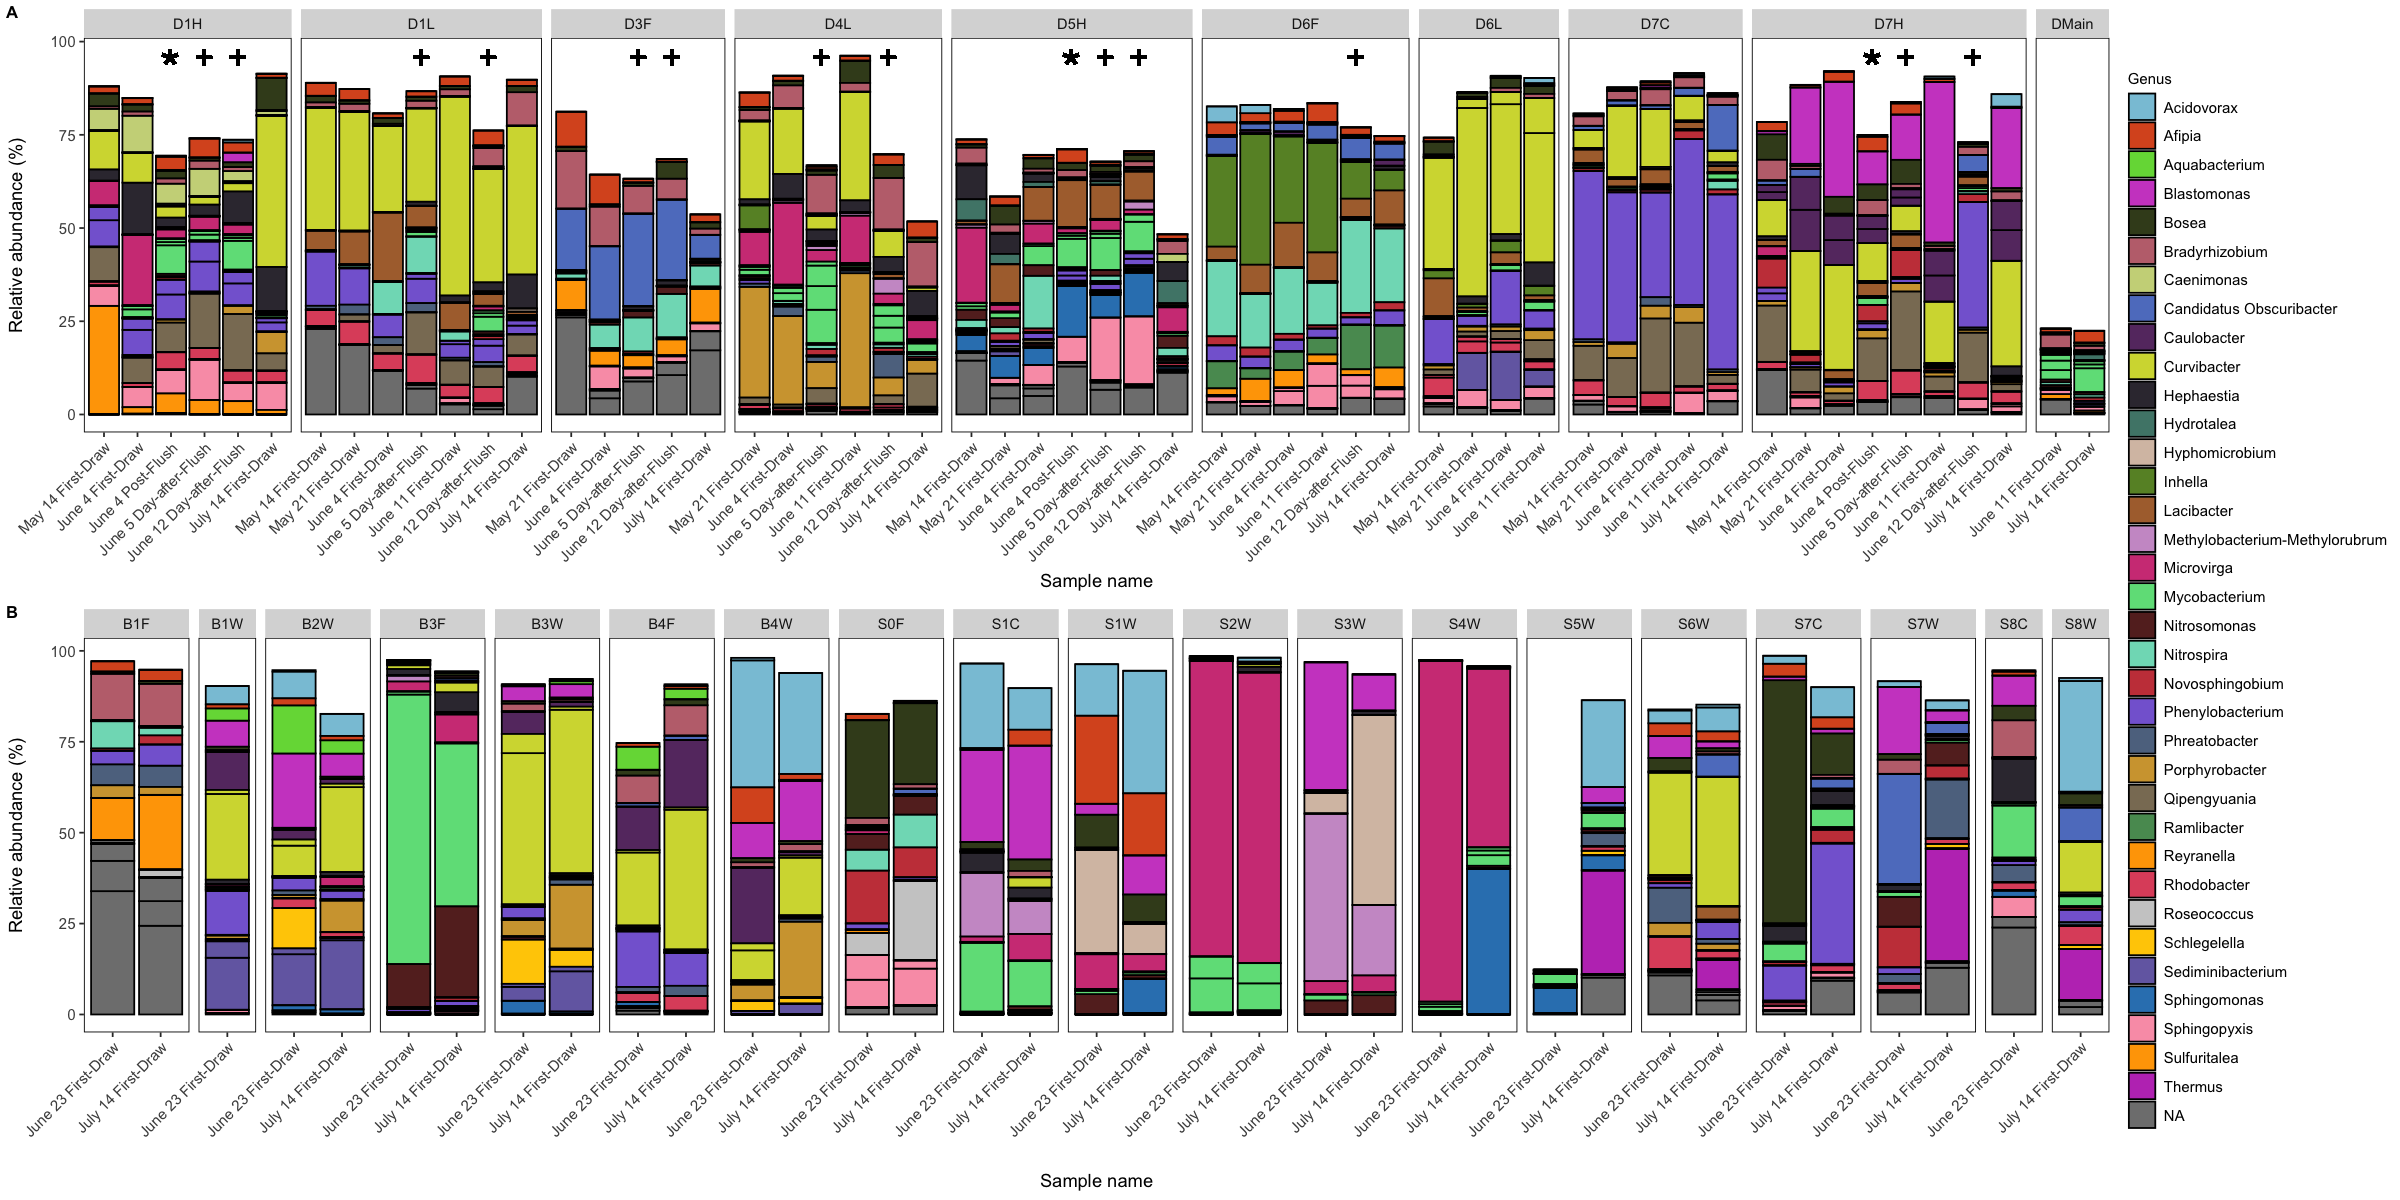

In [40]:
options(repr.plot.width = 20, repr.plot.height = 10)
fig_rel_all <- ggarrange(davis_bar_fixture, dorm_bar_fixture, nrow=2, labels= c("A", "B"), font.label = list(size = 10, color = "black", face = "bold", family = NULL), legend = "right", common.legend = T, align = c("hv"))
fig_rel_all

ggsave(paste0(fig_dir, 'Figure5.jpeg'), width=20, height=10)


Warning message:
“Removed 111 rows containing missing values (position_stack).”


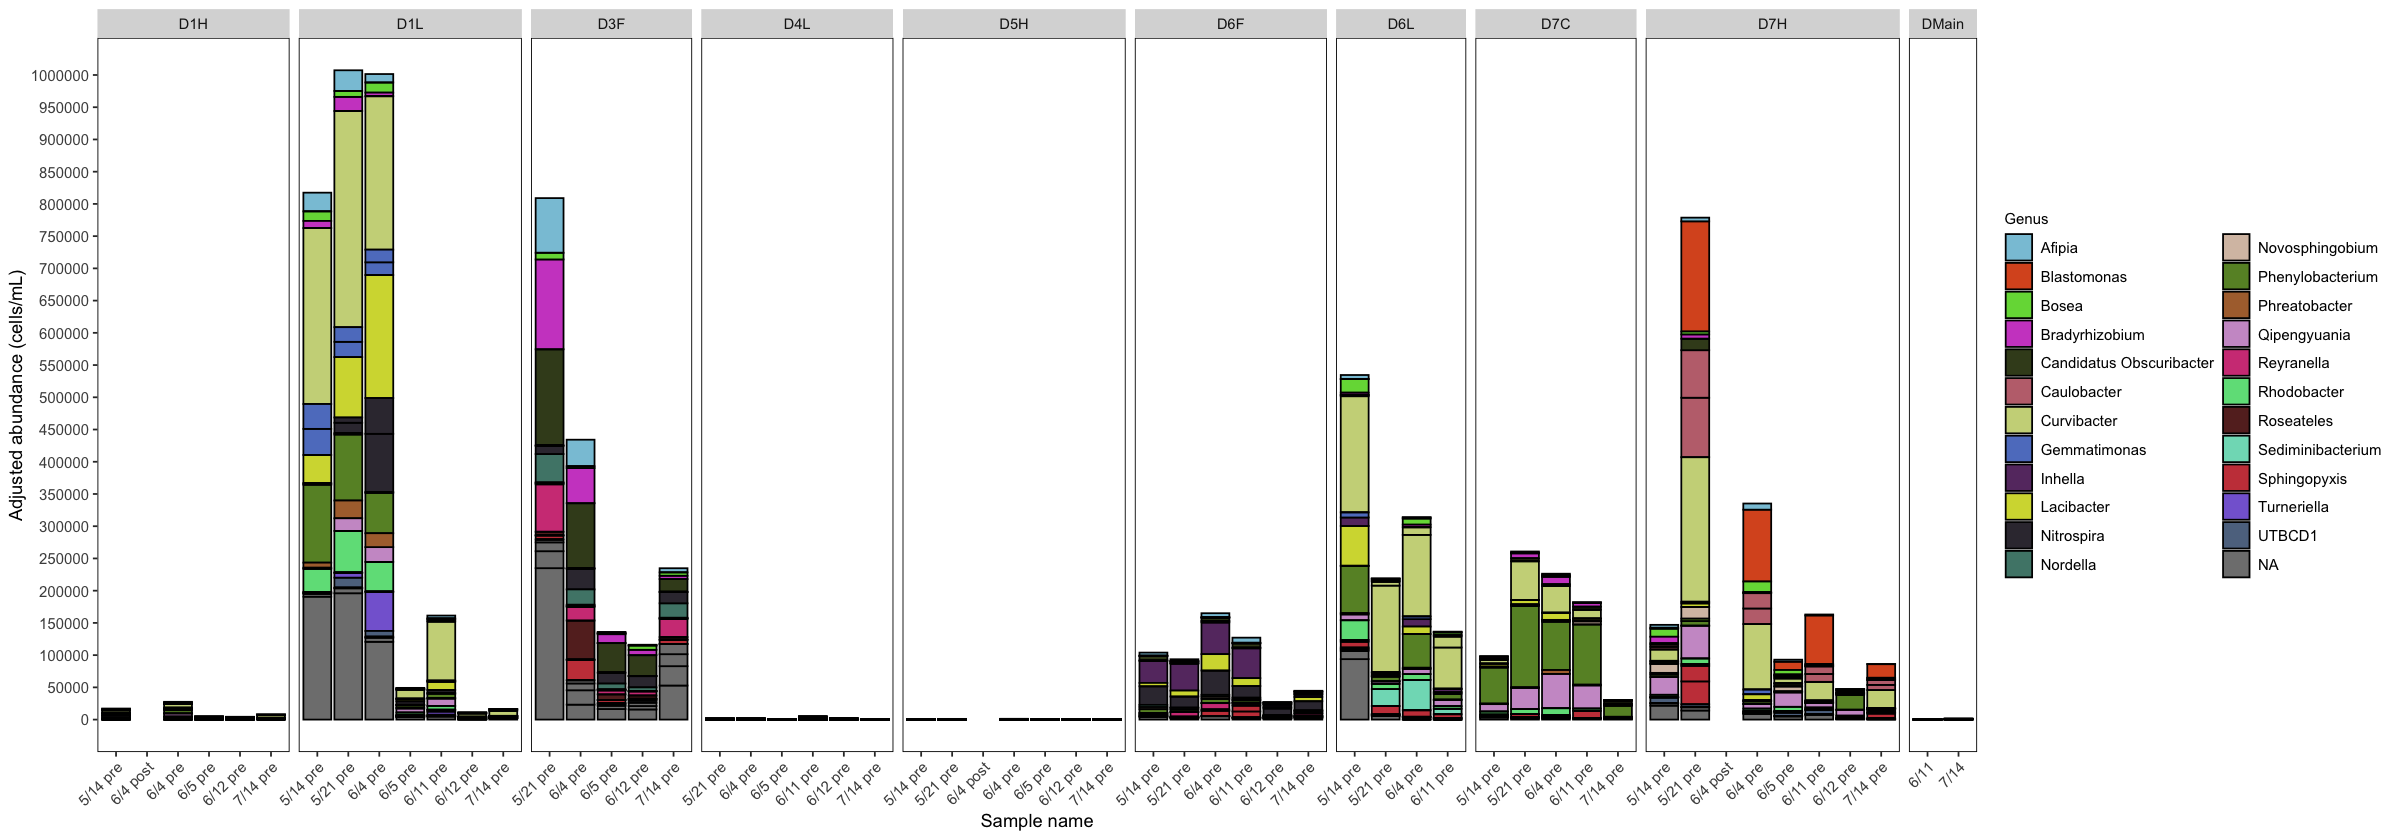

In [41]:
## Building D, absolute abundance
options(repr.plot.width = 20, repr.plot.height = 7)
ps_cells_davis_filt <- filter_taxa(ps_cells_davis, filterfun(kOverA(1, 15000)), TRUE)

davis_cells_bar_fixture <- plot_bar(ps_cells_davis_filt, x="Sample", fill="Genus") + scale_fill_manual(values = colors) + 
  scale_x_discrete(labels=c('D119_051420_pre'= '5/14 pre', 'D119_052120_pre'= '5/21 pre', 'D119_060420_pre'= '6/4 pre',
'D119_060520_pre'= '6/5 pre', 'D119_061120_pre'= '6/11 pre', 'D119_061220_pre'= '6/12 pre',
'D119_071420_pre'= '7/14 pre', 'D1H_051420_pre'= '5/14 pre', 'D1H_060420_post'= '6/4 post',
'D1H_060420_pre'= '6/4 pre', 'D1H_060520_pre' = '6/5 pre', 'D1H_061220_pre'= '6/12 pre', 
'D1H_071420_pre'= '7/14 pre', 'D3F_052120_pre'= '5/21 pre', 'D3F_060420_pre'= '6/4 pre', 
'D3F_060520_pre'= '6/5 pre','D3F_061220_pre'= '6/12 pre', 'D3F_071420_pre'= '7/14 pre',
'D434_052120_pre'= '5/21 pre','D434_060420_pre'= '6/4 pre','D434_060520_pre'= '6/5 pre',
'D434_061120_pre'= '6/11 pre','D434_061220_pre'= '6/12 pre','D434_071420_pre'= '7/14 pre',
'D5B_051420_pre'= '5/14 pre', 'D5B_052120_pre'= '5/21 pre','D5B_060420_post'= '6/4 post',
'D5B_060420_pre'= '6/4 pre','D5B_060520_pre'= '6/5 pre','D5B_061220_pre'= '6/12 pre',
'D5B_071420_pre'= '7/14 pre','D641_051420_pre'= '5/14 pre', 'D641_052120_pre'= '5/21 pre',
'D641_060420_pre'= '6/4 pre','D641_061120_pre'= '6/11 pre','D6F_051420_pre'= '5/14 pre',
'D6F_052120_pre'= '5/21 pre','D6F_060420_pre'= '6/4 pre','D6F_061120_pre'= '6/11 pre',
'D6F_061220_pre'= '6/12 pre', 'D6F_071420_pre'= '7/14 pre','D7C_051420_pre'= '5/14 pre',
'D7C_052120_pre'= '5/21 pre','D7C_060420_pre'= '6/4 pre','D7C_061120_pre'= '6/11 pre',
'D7C_071420_pre'= '7/14 pre','D7H_051420_pre'= '5/14 pre','D7H_052120_pre'= '5/21 pre',
'D7H_060420_post'= '6/4 post','D7H_060420_pre'= '6/4 pre','D7H_060520_pre'= '6/5 pre',
'D7H_061120_pre'= '6/11 pre','D7H_061220_pre'= '6/12 pre','D7H_071420_pre'= '7/14 pre',
'DMain_061120_main'= '6/11', 'DMain_071420_main'= '7/14'))+
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9),
        axis.text.y = element_text(size=9),
        legend.text=element_text(size=9), 
        legend.title=element_text(size=9))+
    facet_grid(.~tap_code, scale="free_x", space="free_x")+
scale_y_continuous(breaks=seq(0,1000000,50000))+
# scale_fill_manual(values = colors) +
# scale_y_continuous(trans="log10", limits=c(1,1000000), labels=trans_format("log10", math_format(10^.x)))+
ylab("Adjusted abundance (cells/mL)") +
xlab("Sample name")+
guides(fill=guide_legend(ncol=2))

davis_cells_bar_fixture

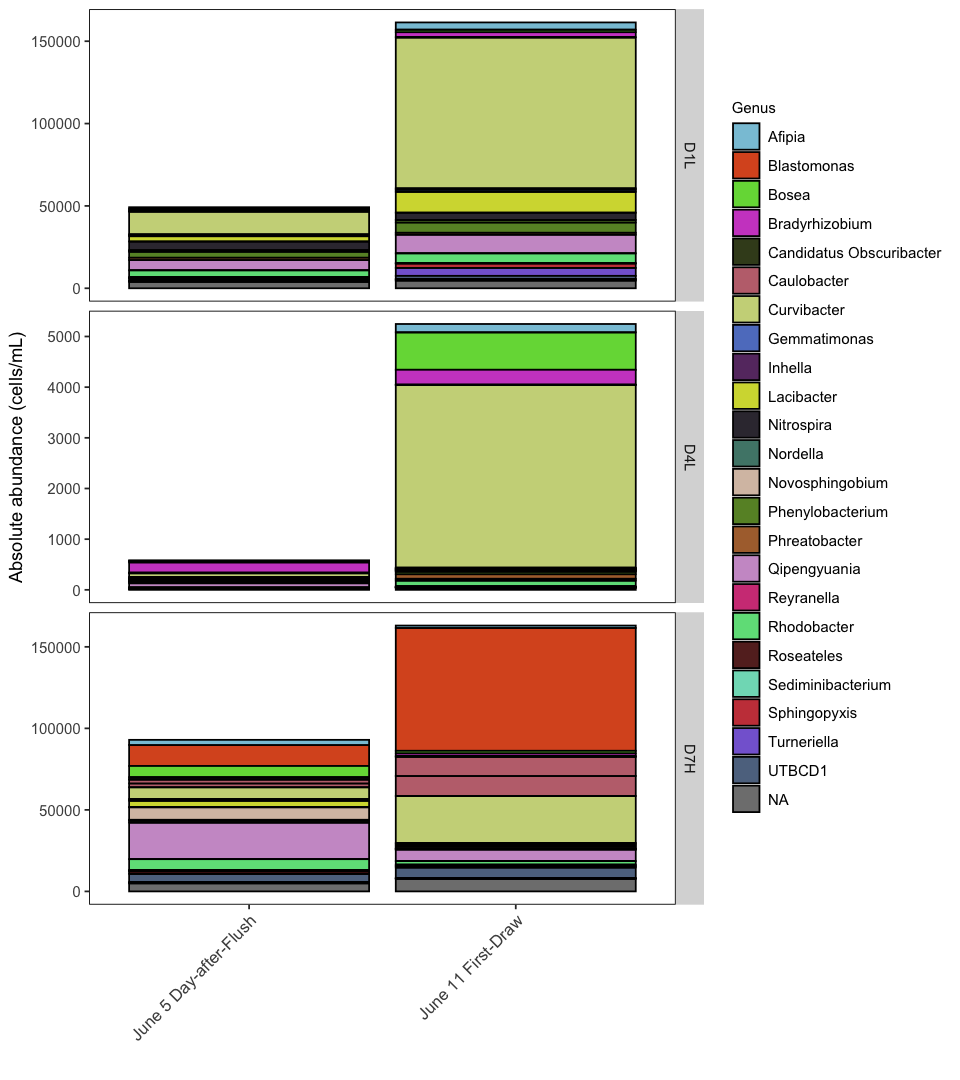

In [45]:
## residence halls, absolute abundance
options(repr.plot.width = 8, repr.plot.height = 9)

ps_cells_davis_filt <- filter_taxa(ps_cells_davis, filterfun(kOverA(1, 15000)), TRUE)
ps_cells_growth <- subset_samples(ps_cells_davis_filt, subset = (date_cat %in% c("6/5_pre", "6/11_pre"))) 
ps_cells_growth <- subset_samples(ps_cells_growth, subset = (tap_code %in% c("D1L", "D4L", "D7H"))) 

pre_1day_bar <- plot_bar(ps_cells_growth, x="date_formal", fill="Genus") + scale_fill_manual(values = colors) + 
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=10),
        axis.text.y = element_text(size=9),
        legend.text=element_text(size=9), 
        legend.title=element_text(size=9))+
    facet_grid(rows= vars(tap_code),  scales= "free_y")+
# scale_y_continuous(breaks=seq(0,1000000,10000))+
# scale_fill_manual(values = colors) +
ylab("Absolute abundance (cells/mL)") +
xlab("")+
guides(fill=guide_legend(ncol=1))

pre_1day_bar

ggsave(paste0(fig_dir, 'FigureS11.jpeg'), width=8, height=9)

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


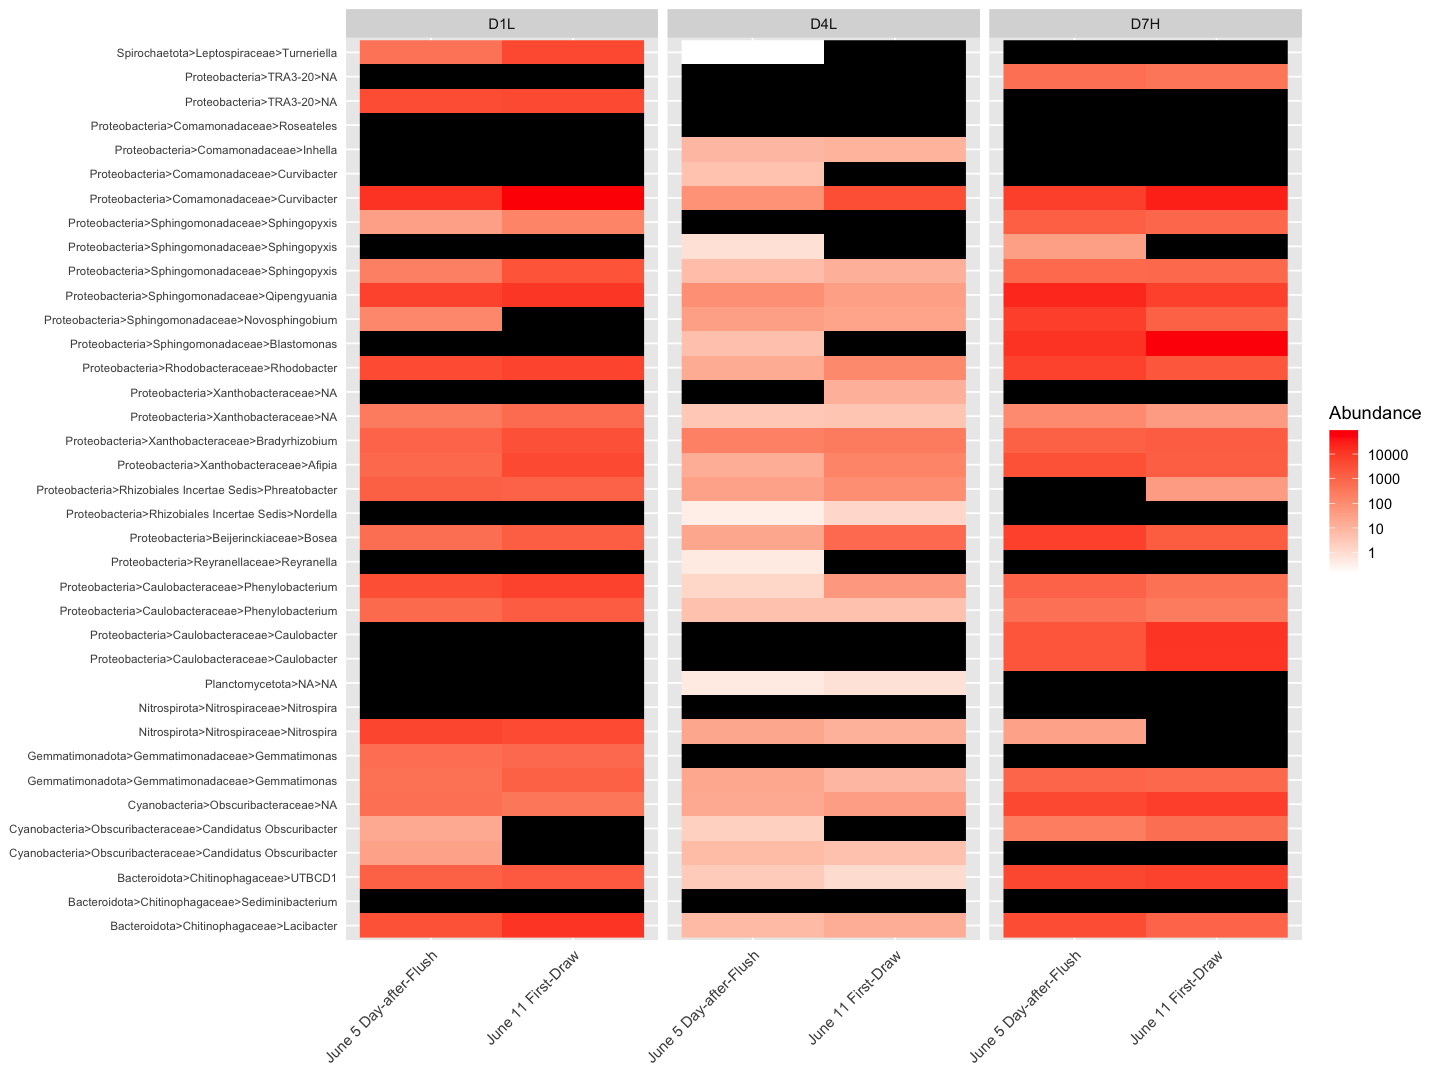

In [46]:
#plot 6 day growth heatmap
sample_order <- c("D119_060520_pre", "D119_061120_pre", "D434_060520_pre", "D434_061120_pre","D7H_060520_pre", "D7H_061120_pre")

options(repr.plot.width = 12, repr.plot.height = 9)
plot_heatmap(ps_cells_growth, taxa.label = "combined", sample.label = "date_formal", taxa.order= "Genus", sample.order = sample_order, method="NMDS", 
        low="white", high="red", na.value="black", trans = log_trans(10))+
     theme(axis.text.y = element_text(size=7), 
           axis.title.y = element_blank(), 
           axis.title.x = element_blank(), 
           axis.ticks = element_blank(),
           axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9))+
     facet_grid(.~tap_code, scale="free_x", space="free_x")

ggsave(paste0(fig_dir, 'FigureS12.jpeg'), width=20, height=10)

In [47]:
#transform absolute abundances into cell counts using FCM for a subset
ps_flush <- subset_samples(ps, subset = (tap_code %in% c("D1H", "D5H", "D7H", "DMain"))) 
ps_flush <- subset_samples(ps_flush, subset = (date_cat %in% c("6/4_pre", "6/4_post", "6/5_pre", "6/11_pre"))) 

ps_frac_flush <- transform_sample_counts(ps_flush, function(x) x/sum(x))
ps_frac_flush_filt <- filter_taxa(ps_frac_flush, filterfun(kOverA(1, 0.04)), TRUE)
                                   
ps_cells_flush <- ps_frac_flush_filt

for(n in 1:nsamples(ps_frac_flush_filt))
{
otu_table(ps_cells_flush)[n,] <- otu_table(ps_frac_flush_filt)[n,]*sample_data(ps_frac_flush_filt)$TCC [n]
}
                                         
ps_cells_flush

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 32 taxa and 11 samples ]
sample_data() Sample Data:       [ 11 samples by 124 sample variables ]
tax_table()   Taxonomy Table:    [ 32 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 32 reference sequences ]

In [48]:
## Building D, flush, absolute abundance
options(repr.plot.width = 10, repr.plot.height = 10)

#relative abundance
ps_flush <- subset_samples(ps_perc, subset = (tap_code %in% c("D1H", "D5H", "D7H", "DMain"))) 
ps_flush <- subset_samples(ps_flush, subset = (date_cat %in% c("6/4_pre", "6/4_post", "6/5_pre", "6/11_pre"))) 
ps_flush_filt <- filter_taxa(ps_flush, filterfun(kOverA(1, 4)), TRUE)

davis_perc_bar_flush <- plot_bar(ps_flush_filt, x="date_cat", fill="Genus") + scale_fill_manual(values = colors) + 
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9),
        axis.text.y = element_text(size=9),
        legend.text=element_text(size=9), 
        legend.title=element_text(size=9))+
    facet_grid(rows= vars(tap_code), scale="free_y")+
ylab("Relative abundance (%)") +
xlab("")+
guides(fill=guide_legend(ncol=1))

#absolute abundance
# ps_flush <- subset_samples(ps_cells_davis, subset = (tap_code %in% c("D1H", "D5H", "D7H", "DMain"))) 
# ps_flush <- subset_samples(ps_flush, subset = (date_cat %in% c("6/4_pre", "6/4_post", "6/5_pre", "6/11_pre"))) 

davis_cells_bar_flush <- plot_bar(ps_cells_flush, x="date_cat", fill="Genus") + scale_fill_manual(values = colors) + 
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9),
        axis.text.y = element_text(size=9),
        legend.text=element_text(size=9), 
        legend.title=element_text(size=9))+
    facet_grid(rows= vars(tap_code), scale="free_y")+
ylab("Absolute abundance (cells/mL)") +
xlab("")+
guides(fill=guide_legend(ncol=1))

# davis_flush_fig <- ggarrange(davis_perc_bar_flush, davis_cells_bar_flush, nrow=1, labels= c("A", "B"), font.label = list(size = 10, color = "black", face = "bold", family = NULL), legend = "right", common.legend = F, align = c("hv"))
# davis_flush_fig

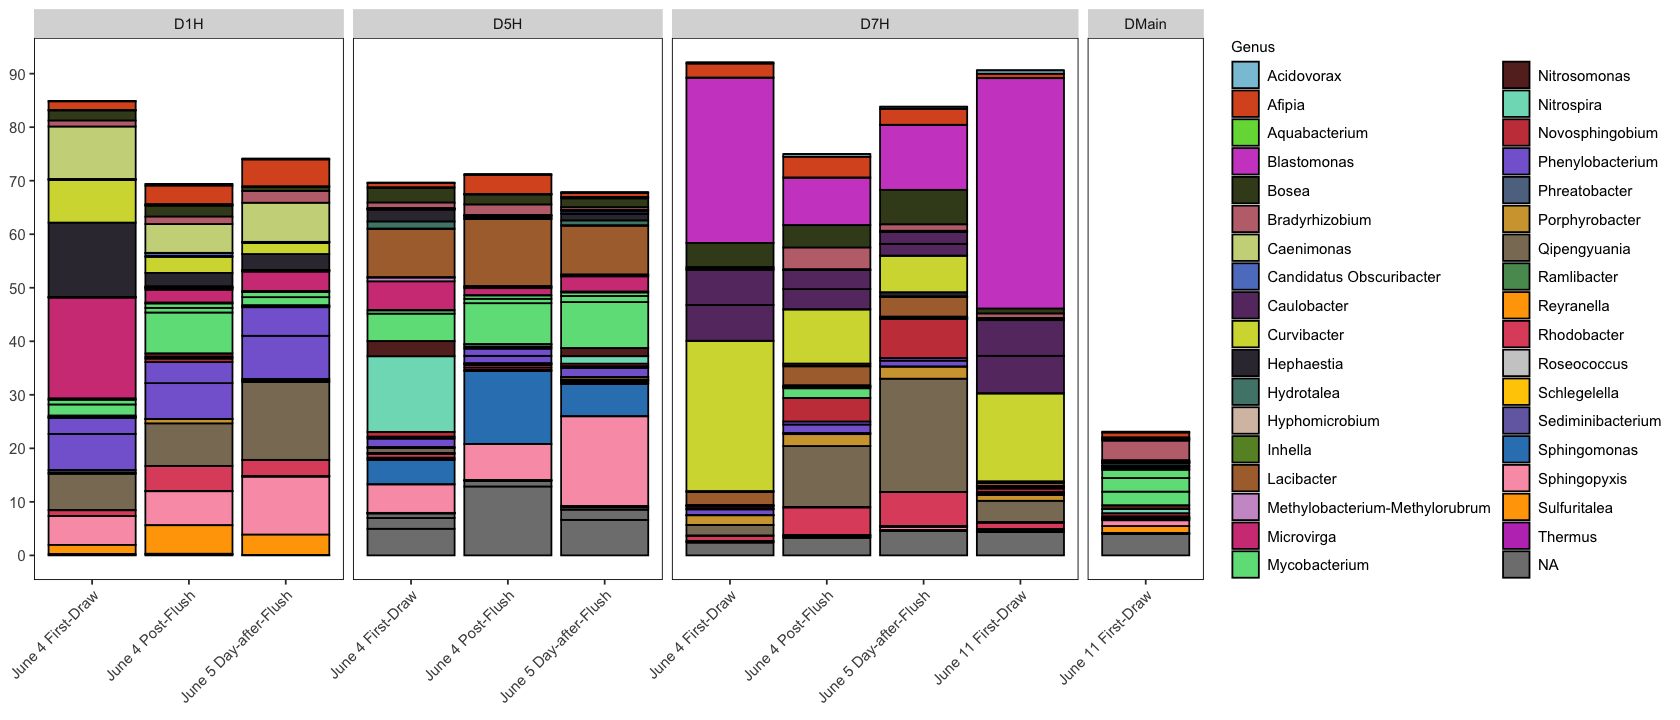

In [49]:
## Building D, flush, relative abundance
options(repr.plot.width = 14, repr.plot.height = 6)

ps_flush <- subset_samples(ps_perc_filt_davis, subset = (tap_code %in% c("D1H", "D5H", "D7H", "DMain"))) 
ps_flush <- subset_samples(ps_flush, subset = (date_cat %in% c("6/4_pre", "6/4_post", "6/5_pre", "6/11_pre"))) 

#set order to categorical dates in samples
# sample_data(ps)$date_cat<- factor(sample_data(ps)$Sample, order = TRUE, levels =c('5/14_pre', '5/14_post', '5/21_pre', '6/4_pre', '6/4_post', '6/5_pre', '6/11_pre', '6/11_post', '6/12_pre', '6/23_pre','7/14_pre', '6/11_not_flushed_main'))

davis_bar_flush <- plot_bar(ps_flush, x="date_formal", fill="Genus") + scale_fill_manual(values = colors) + 
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9),
        axis.text.y = element_text(size=9),
        axis.title.y= element_blank(),
      axis.title.x= element_blank(),
        legend.text=element_text(size=9), 
        legend.title=element_text(size=9))+
    facet_grid(.~tap_code, scale="free_x", space="free_x")+
scale_y_continuous(breaks=seq(0,100,10))+
# scale_y_continuous(trans="log10", limits=c(1,1000000), labels=trans_format("log10", math_format(10^.x)))+
ylab("Relative abundance (%)") +
guides(fill=guide_legend(ncol=2))

davis_bar_flush
ggsave(paste0(fig_dir, 'FigureS9.jpeg'), width=14, height=6)

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


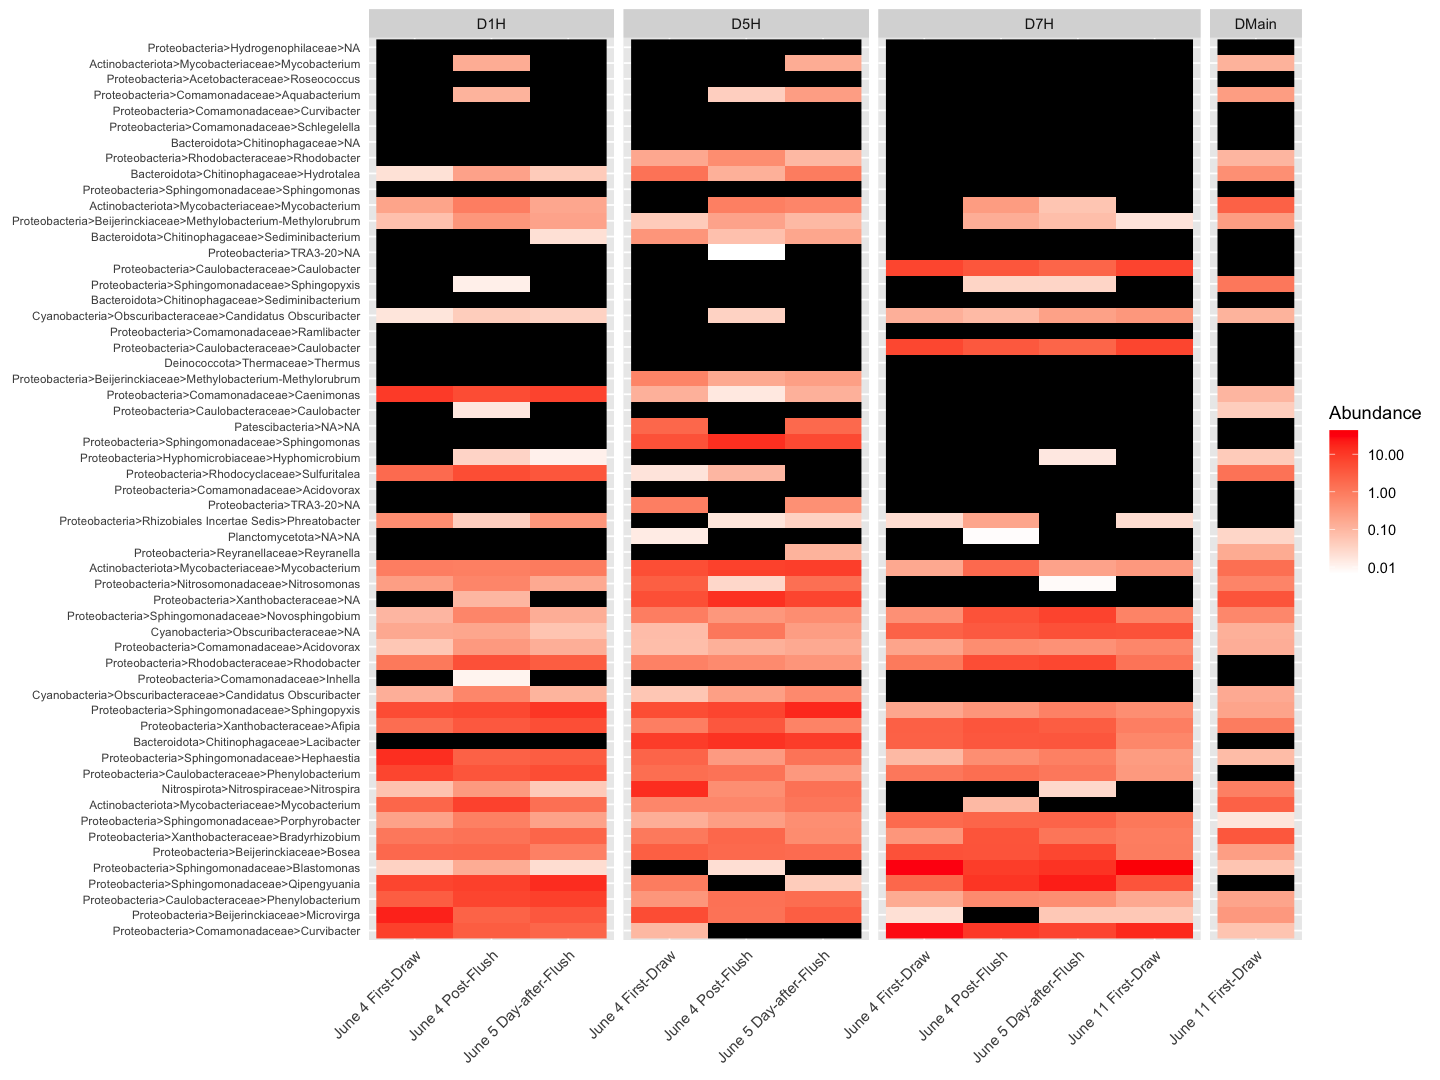

In [50]:
#plot flush heatmap
sample_order <- c("D1H_060420_pre", "D1H_060420_post", "D1H_060520_pre",  "D5B_060420_pre", "D5B_060420_post", "D5B_060520_pre",  "D7H_060420_pre", "D7H_060420_post", "D7H_060520_pre", "D7H_061120_pre", "DMain_061120_main")

options(repr.plot.width = 12, repr.plot.height = 9)
plot_heatmap(ps_flush, taxa.label = "combined", sample.label = "date_formal", sample.order = sample_order, method="NMDS", 
        low="white", high="red", na.value="black", trans = log_trans(10))+
     theme(axis.text.y = element_text(size=7), 
           axis.title.y = element_blank(), 
           axis.title.x = element_blank(), 
           axis.ticks = element_blank(),
           axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9))+
     facet_grid(.~tap_code, scale="free_x", space="free_x")

ggsave(paste0(fig_dir, 'FigureS10.jpeg'), width=20, height=10)

## Examining drinking fountain taxa

In [51]:
# collect filtered taxa
ps_fountain <- subset_samples(ps_perc, subset = fixture_type %in% "fountain")
ps_fountain_filt1.3 <- filter_taxa(ps_fountain, filterfun(kOverA(1, 3)), TRUE)

# fountain_filt_tax <- taxa(ps_RO_filt1.05)


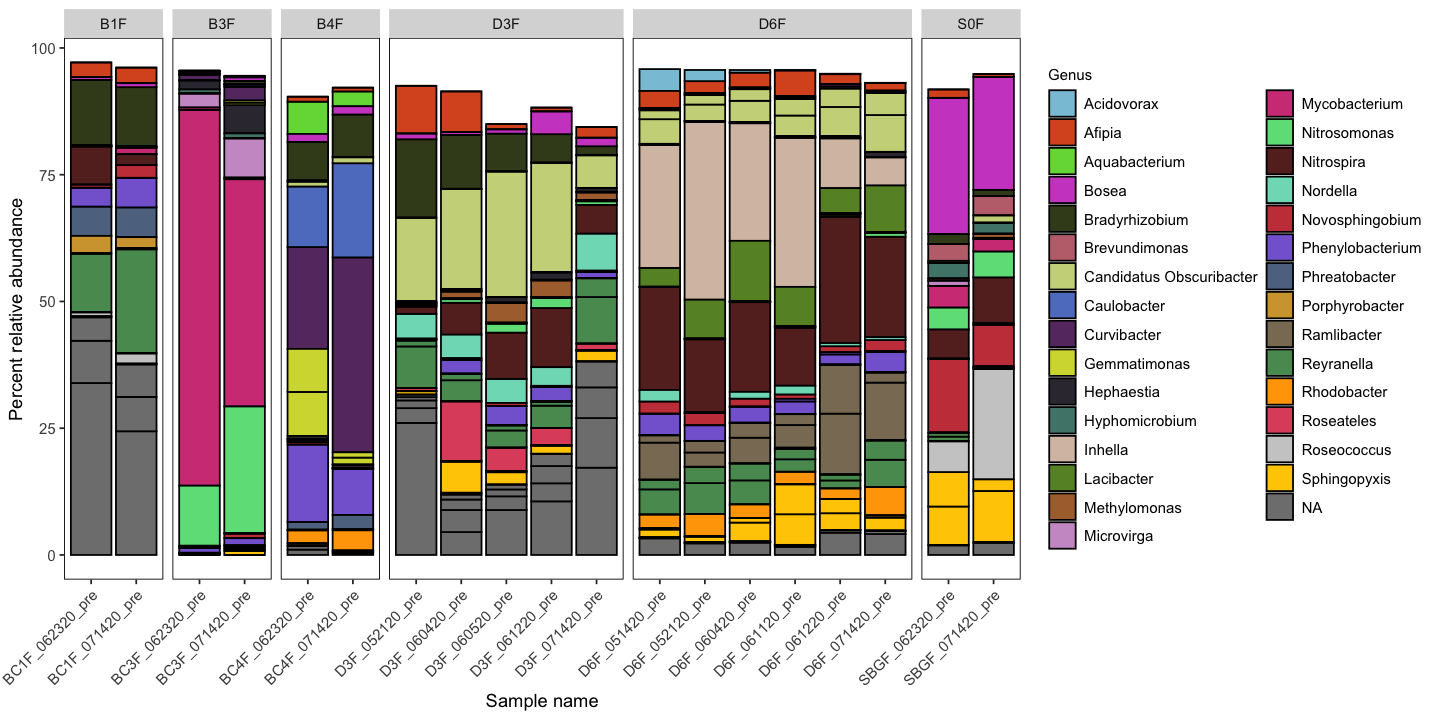

In [52]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot_bar(ps_fountain_filt1.3, x="sample_name", fill="Genus")  +  scale_fill_manual(values = colors) + 
  theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9),
        axis.text.y = element_text(size=9),
        legend.text=element_text(size=9), 
        legend.title=element_text(size=9))+
    facet_grid(.~tap_code, scale="free_x", space="free_x")+
ylab("Percent relative abundance") +
xlab("Sample name")+
guides(fill=guide_legend(ncol=2))

ggsave(paste0(fig_dir, 'fountain_bar.jpeg'), width=12, height=6)

# Beta diversity

In [53]:
set.seed(1995)
ps_perc.ord <- ordinate(ps_perc, "NMDS", "bray")

#stress of 0.3 means arbitrary, 0.2 means suspect, 0.1 is fair, <0.5 is good

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1766774 
Run 1 stress 0.2099537 
Run 2 stress 0.2162747 
Run 3 stress 0.2070024 
Run 4 stress 0.2000006 
Run 5 stress 0.1839428 
Run 6 stress 0.2127773 
Run 7 stress 0.2385612 
Run 8 stress 0.2080707 
Run 9 stress 0.2000268 
Run 10 stress 0.1767372 
... Procrustes: rmse 0.003561237  max resid 0.02429409 
Run 11 stress 0.1793565 
Run 12 stress 0.2007539 
Run 13 stress 0.2036531 
Run 14 stress 0.1767366 
... Procrustes: rmse 0.008253636  max resid 0.05697494 
Run 15 stress 0.2411291 
Run 16 stress 0.2245008 
Run 17 stress 0.2291327 
Run 18 stress 0.1976685 
Run 19 stress 0.1976728 
Run 20 stress 0.1899283 
*** No convergence -- monoMDS stopping criteria:
     1: no. of iterations >= maxit
    18: stress ratio > sratmax
     1: scale factor of the gradient < sfgrmin


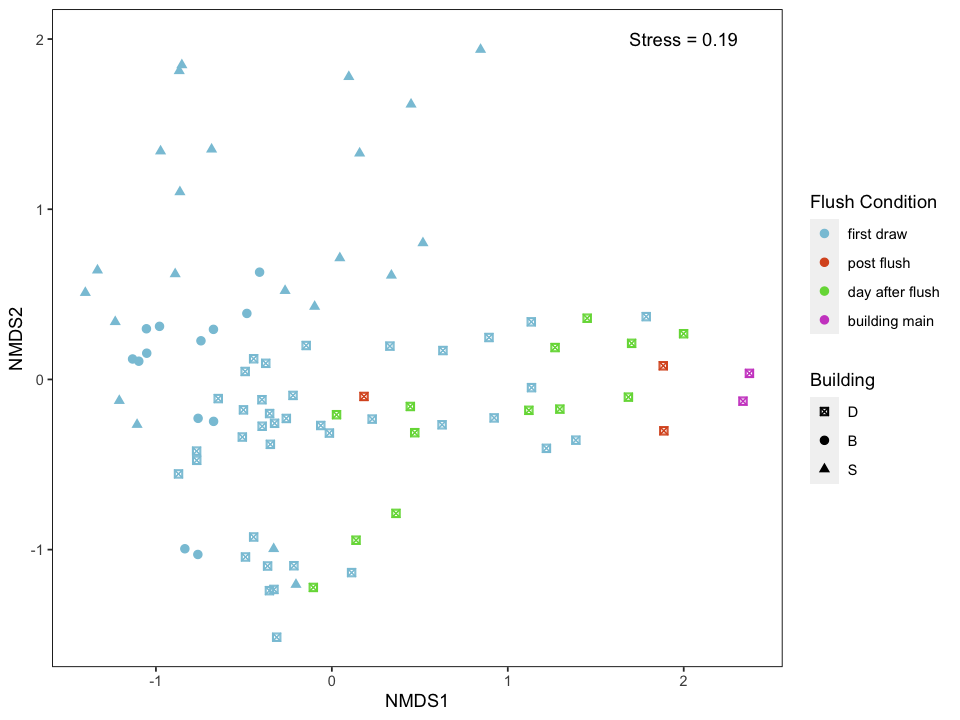

In [54]:
#coloring by flushing shows that davis main samples are dissimilar from the rest, 
#with flushed samples being the closest and other davis samples being next (check date to see if these are )
options(repr.plot.width = 8, repr.plot.height = 6)
plot_ordination(ps_perc, ps_perc.ord,  color="flush", shape= "building") +
geom_point(size=2)+
    scale_shape_manual(values=c(7,19,17),
                       name="Building",
                       labels=c("D", "B", "S"))+
    scale_color_manual(values = c(colors[1],colors[2],colors[3],colors[4]),
                       name="Flush Condition",
                       labels=c("first draw", "post flush", "day after flush", "building main" ))+
#     geom_text(aes(label=sample_name),hjust=1, vjust=1)+
 annotate(geom= "text", x=2, y=2, label="Stress = 0.19")+
    theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
# ggsave('~/scientific_work/Nelson_lab/sandiego/dpwf_NMDS.pdf', device='pdf', width = 4, height = 2.5)

Too few points to calculate an ellipse

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


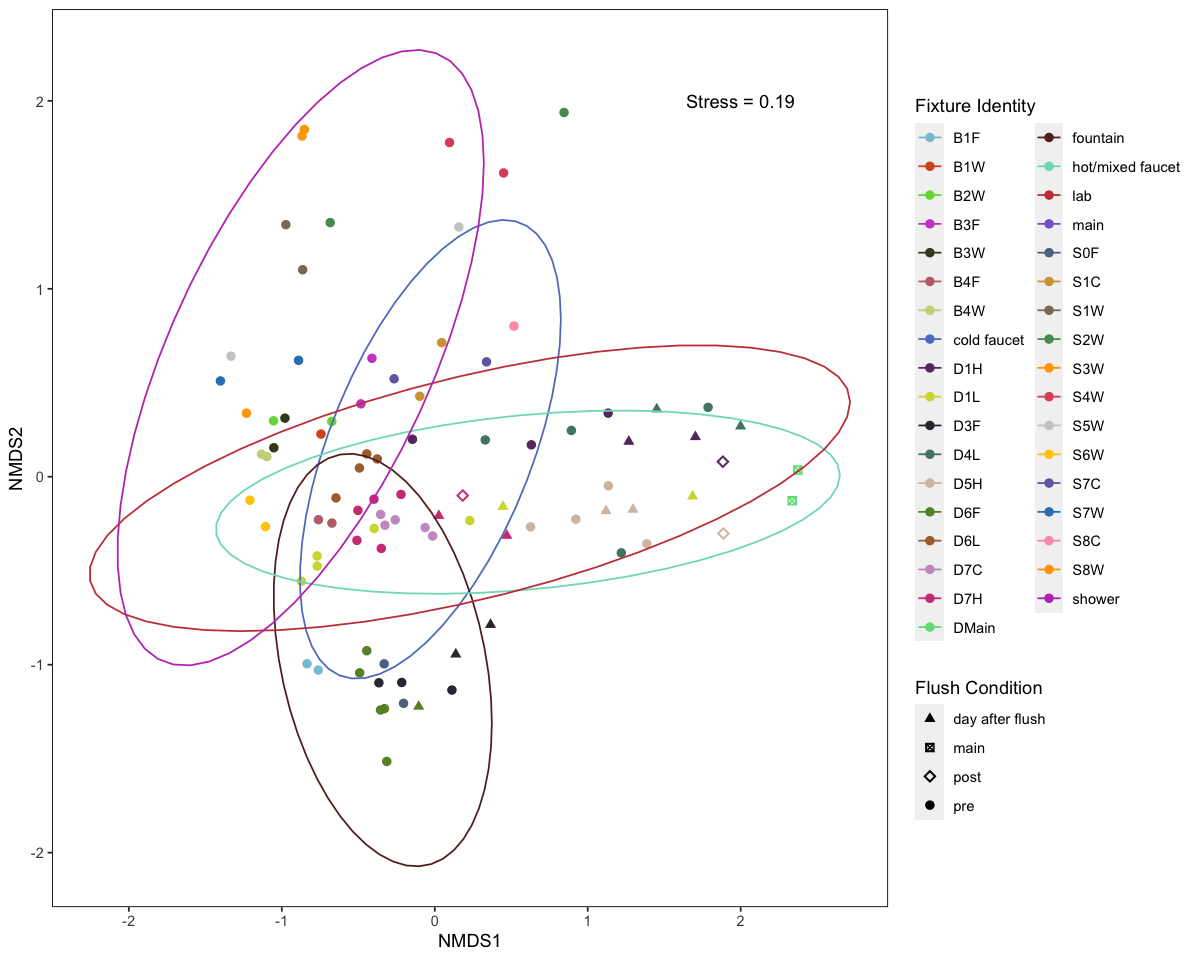

In [55]:
#coloring by flushing shows that davis main samples are dissimilar from the rest, 
#with flushed samples being the closest and other davis samples being next (check date to see if these are )
options(repr.plot.width = 10, repr.plot.height = 8)
plot_ordination(ps_perc, ps_perc.ord,  color="tap_code", shape= "flush") +
geom_point(size=2)+
    scale_shape_manual(values=c( 17, 7,5, 19),
                       name="Flush Condition")+
    scale_color_manual(values = colors,
                       name="Fixture Identity")+
 annotate(geom= "text", x=2, y=2, label="Stress = 0.19")+
stat_ellipse(type = "t", linetype = 1, aes(group= fixture_type, color= fixture_type)) +
    theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
# ggsave('~/scientific_work/Nelson_lab/sandiego/dpwf_NMDS.pdf', device='pdf', width = 4, height = 2.5)

In [56]:
set.seed(1995)
# ps_perc_pre <- subset_samples(ps_perc_davis, subset = (flush %in% c("pre", "post", "day after flush")))
ps_perc_pre.ord <- ordinate(ps_perc_davis, "NMDS", "bray")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1238255 
Run 1 stress 0.1240139 
... Procrustes: rmse 0.004318127  max resid 0.02271342 
Run 2 stress 0.1240138 
... Procrustes: rmse 0.004304891  max resid 0.02275244 
Run 3 stress 0.1247583 
Run 4 stress 0.1249755 
Run 5 stress 0.1241712 
... Procrustes: rmse 0.007736971  max resid 0.03023973 
Run 6 stress 0.1247583 
Run 7 stress 0.1250773 
Run 8 stress 0.1240044 
... Procrustes: rmse 0.005380194  max resid 0.03098111 
Run 9 stress 0.1248687 
Run 10 stress 0.1240139 
... Procrustes: rmse 0.004317521  max resid 0.02271357 
Run 11 stress 0.1238259 
... Procrustes: rmse 0.0002608409  max resid 0.001682294 
... Similar to previous best
Run 12 stress 0.1241763 
... Procrustes: rmse 0.006948158  max resid 0.0309217 
Run 13 stress 0.1241762 
... Procrustes: rmse 0.006958703  max resid 0.03086879 
Run 14 stress 0.1248687 
Run 15 stress 0.1247583 
Run 16 stress 0.1249755 
Run 17 stress 0.1238256 
... Procrustes: rmse 0

Warning message:
“Using shapes for an ordinal variable is not advised”
Too few points to calculate an ellipse

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


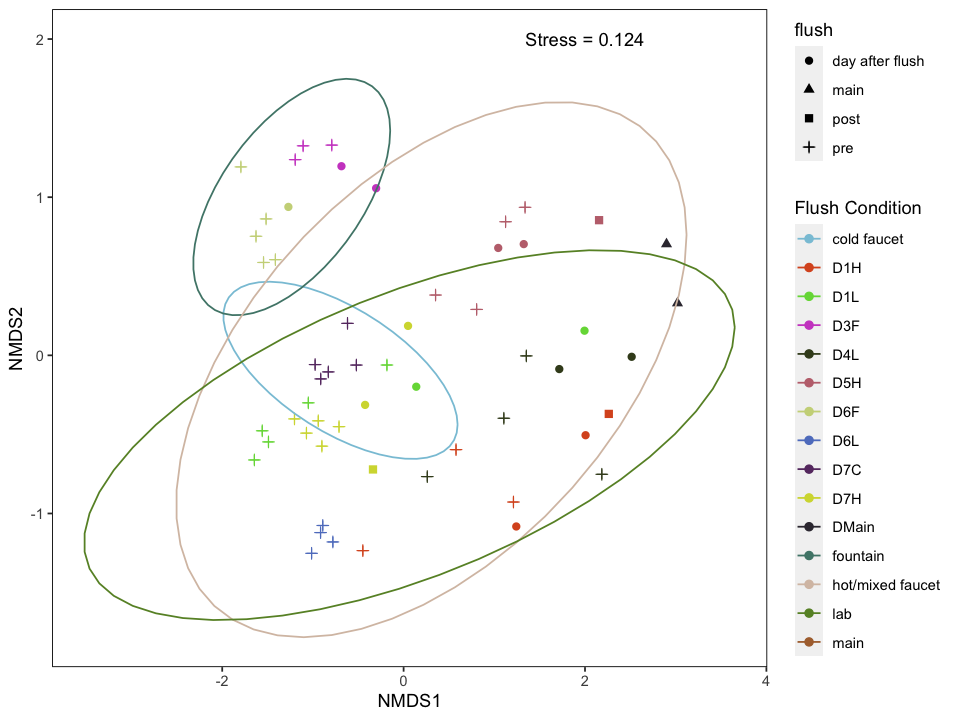

In [57]:
#coloring by flushing shows that davis main samples are dissimilar from the rest, 
#with flushed samples being the closest and other davis samples being next (check date to see if these are )
options(repr.plot.width = 8, repr.plot.height = 6)
plot_ordination(ps_perc_davis, ps_perc_pre.ord,  color="tap_code", shape= "flush") +
geom_point(size=2)+
#     scale_shape_manual(values=c(19,17),
#                        name="Building")+
    scale_color_manual(values = colors,
                       name="Flush Condition")+
# stat_ellipse(type = "t", linetype = 1, aes(group= tap_code)) +
#     geom_text(aes(label=sample_name),hjust=1, vjust=1)+
 annotate(geom= "text", x=2, y=2, label="Stress = 0.124")+
 stat_ellipse(type = "t", linetype = 1, aes(group= fixture_type, color= fixture_type)) +
    theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
# ggsave('~/scientific_work/Nelson_lab/sandiego/dpwf_NMDS.pdf', device='pdf', width = 4, height = 2.5)

In [58]:
#just fountains
set.seed(1995)
ps_perc_f <- subset_samples(ps_perc, subset = (fixture_type %in% "fountain"))
ps_perc_f.ord <- ordinate(ps_perc_f, "NMDS", "bray")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1207002 
Run 1 stress 0.1207002 
... Procrustes: rmse 0.0003389196  max resid 0.001081607 
... Similar to previous best
Run 2 stress 0.1203434 
... New best solution
... Procrustes: rmse 0.04848298  max resid 0.1173439 
Run 3 stress 0.2358065 
Run 4 stress 0.3299469 
Run 5 stress 0.1207003 
... Procrustes: rmse 0.04841179  max resid 0.1196536 
Run 6 stress 0.1203434 
... Procrustes: rmse 9.652263e-06  max resid 2.078093e-05 
... Similar to previous best
Run 7 stress 0.1203434 
... New best solution
... Procrustes: rmse 4.729674e-06  max resid 1.28033e-05 
... Similar to previous best
Run 8 stress 0.1203434 
... Procrustes: rmse 7.093395e-06  max resid 1.433012e-05 
... Similar to previous best
Run 9 stress 0.1207001 
... Procrustes: rmse 0.04855535  max resid 0.1204161 
Run 10 stress 0.1207003 
... Procrustes: rmse 0.04871708  max resid 0.1212145 
Run 11 stress 0.1207003 
... Procrustes: rmse 0.04871872  max res

Warning message:
“Using shapes for an ordinal variable is not advised”
Warning message:
“Using shapes for an ordinal variable is not advised”


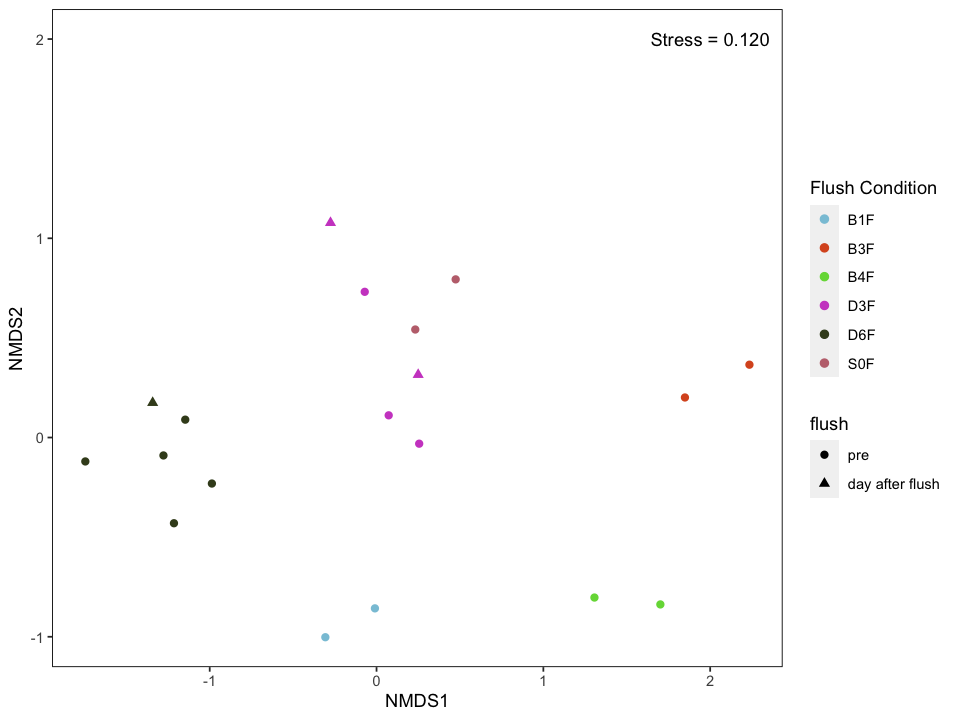

In [59]:
#coloring by flushing shows that davis main samples are dissimilar from the rest, 
#with flushed samples being the closest and other davis samples being next (check date to see if these are )
options(repr.plot.width = 8, repr.plot.height = 6)
plot_ordination(ps_perc_f, ps_perc_f.ord,  color="tap_code", shape= "flush") +
geom_point(size=2)+
#     scale_shape_manual(values=c(19,17),
#                        name="Building")+
    scale_color_manual(values = colors,
                       name="Flush Condition")+
# stat_ellipse(type = "t", linetype = 1, aes(group= tap_code)) +
#     geom_text(aes(label=sample_name),hjust=1, vjust=1)+
 annotate(geom= "text", x=2, y=2, label="Stress = 0.120")+
    theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))

ggsave(paste0(fig_dir, 'NMDS-fountains.jpeg'), width=8, height=6)

In [60]:
#not fountains
set.seed(1995)
ps_perc_f <- subset_samples(ps_perc_davis, subset = !(fixture_type %in% "fountain"))
ps_perc_f.ord <- ordinate(ps_perc_f, "NMDS", "bray")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1320344 
Run 1 stress 0.1345339 
Run 2 stress 0.1278183 
... New best solution
... Procrustes: rmse 0.02162742  max resid 0.1103144 
Run 3 stress 0.1268182 
... New best solution
... Procrustes: rmse 0.0118066  max resid 0.06798567 
Run 4 stress 0.1277968 
Run 5 stress 0.1268182 
... Procrustes: rmse 1.48996e-05  max resid 7.27592e-05 
... Similar to previous best
Run 6 stress 0.127893 
Run 7 stress 0.1379314 
Run 8 stress 0.1267201 
... New best solution
... Procrustes: rmse 0.00371966  max resid 0.01863541 
Run 9 stress 0.135342 
Run 10 stress 0.1280408 
Run 11 stress 0.1292725 
Run 12 stress 0.1292743 
Run 13 stress 0.13394 
Run 14 stress 0.1373169 
Run 15 stress 0.1359642 
Run 16 stress 0.1356961 
Run 17 stress 0.1301912 
Run 18 stress 0.1361205 
Run 19 stress 0.1289333 
Run 20 stress 0.1334758 
*** No convergence -- monoMDS stopping criteria:
    17: stress ratio > sratmax
     3: scale factor of the gradie

In [61]:
#based on DIY public restrooms tutorial: http://joey711.github.io/phyloseq-demo/Restroom-Biogeography.html

#Normalized by percent
sample_info = as((sample_data(ps_perc)), "data.frame")
bulk_bray_perc = phyloseq::distance(ps_perc, "bray")
bulk_adonis = adonis(bulk_bray_perc ~ building +date_cat  + tap_code, sample_info)
bulk_adonis

#R2 is highest for tap_code, next by building


Call:
adonis(formula = bulk_bray_perc ~ building + date_cat + tap_code,      data = sample_info) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
building   2     3.710 1.85515 18.7452 0.11535  0.001 ***
date_cat   8     1.632 0.20396  2.0609 0.05073  0.001 ***
tap_code  26    21.478 0.82609  8.3471 0.66776  0.001 ***
Residuals 54     5.344 0.09897         0.16615           
Total     90    32.164                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [62]:
#Only buildingD, now incorporate flush
sample_info = as((sample_data(ps_perc_davis)), "data.frame")
bulk_bray_perc = phyloseq::distance(ps_perc_davis, "bray")
bulk_adonis = adonis(bulk_bray_perc ~  date_cat + flush + tap_code, sample_info)
bulk_adonis

#R2 is highest for tap_code, next by building


Call:
adonis(formula = bulk_bray_perc ~ date_cat + flush + tap_code,      data = sample_info) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
date_cat   7    1.4561 0.20802  2.0817 0.08572  0.001 ***
flush      1    0.8288 0.82884  8.2946 0.04880  0.001 ***
tap_code   8   10.8040 1.35050 13.5151 0.63605  0.001 ***
Residuals 39    3.8971 0.09993         0.22943           
Total     55   16.9861                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [63]:
#PCA with aitchison
ps_clr <- microbiome::transform(ps_perc, transform='clr')
ps_perc.ord <- ordinate(ps_clr, "RDA", "euclidean") 


Warning message:
“Using shapes for an ordinal variable is not advised”
Too few points to calculate an ellipse

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


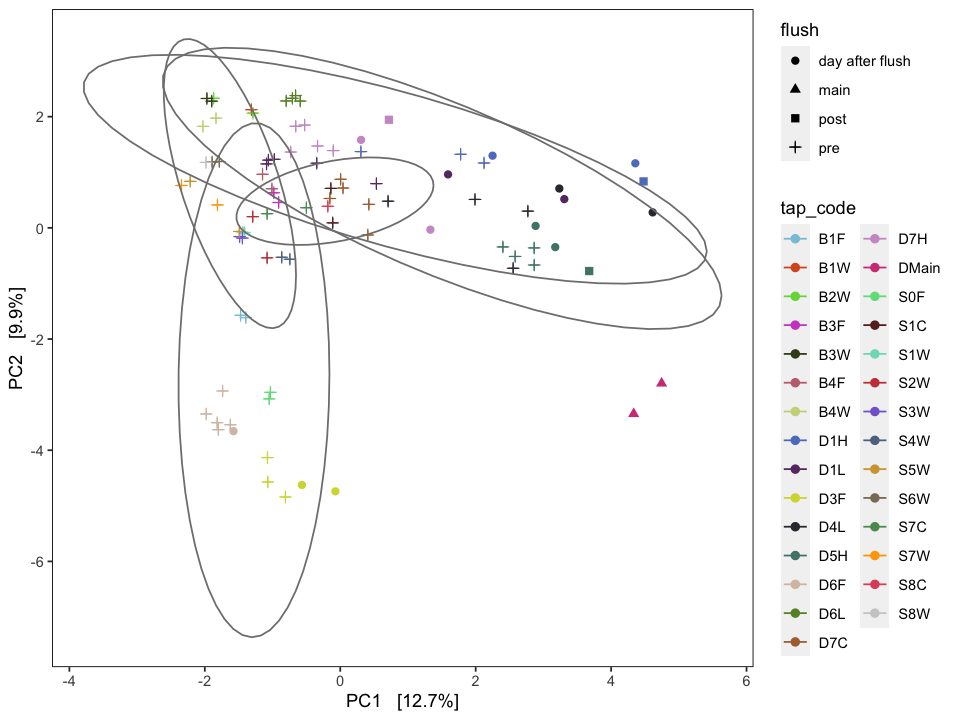

In [64]:
options(repr.plot.width = 8, repr.plot.height = 6)
plot_ordination(ps_perc, ps_perc.ord,  color="tap_code", shape= "flush") +
geom_point(size=2)+
#     scale_shape_manual(values=c(7,19,17),
#                        name="Building",
#                        labels=c("D", "BC", "SB"))+
    scale_color_manual(values = colors)+
#                        name="Flush Condition",
#                        labels=c("first draw", "post flush", "day after flush", "building main" ))+
stat_ellipse(type = "t", linetype = 1, aes(group= fixture_type)) +
    theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))

## Aitchison distance normalized data

In [65]:
##CLR-transformed Euclidean distance (Aitchison distance) 
##Suggested in Gloor et al 2017: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5695134/
ps_clr <- microbiome::transform(ps_perc, transform='clr')
sample_info = as(sample_data(ps_clr), "data.frame")
bulk_eucl = phyloseq::distance(ps_clr, "euclidean")
bulk_adonis_clr = adonis(bulk_eucl ~ building + date_cat  + tap_code + fixture_type, sample_info)
bulk_adonis_clr


Call:
adonis(formula = bulk_eucl ~ building + date_cat + tap_code +      fixture_type, data = sample_info) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
building      2     12391  6195.6 14.5141 0.11934  0.001 ***
date_cat      8      8460  1057.5  2.4773 0.08148  0.001 ***
tap_code     26     60016  2308.3  5.4075 0.57801  0.001 ***
fixture_type  1       340   340.3  0.7972 0.00328  0.612    
Residuals    53     22624   426.9         0.21789           
Total        90    103831                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [66]:
#for just davis and incorporate flush
ps_clr <- microbiome::transform(ps_perc_davis, transform='clr')
sample_info = as(sample_data(ps_clr), "data.frame")
bulk_eucl = phyloseq::distance(ps_clr, "euclidean")
bulk_adonis_clr = adonis(bulk_eucl ~  date_cat + flush + tap_code +fixture_type, sample_info)
bulk_adonis_clr


Call:
adonis(formula = bulk_eucl ~ date_cat + flush + tap_code + fixture_type,      data = sample_info) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
date_cat      7      8155  1165.0  2.1869 0.11513  0.001 ***
flush         1      6184  6183.7 11.6076 0.08730  0.001 ***
tap_code      8     35910  4488.8  8.4260 0.50697  0.001 ***
fixture_type  1       340   340.3  0.6388 0.00480  0.778    
Residuals    38     20244   532.7         0.28579           
Total        55     70833                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Potential opportunistic pathogens

In [67]:
#create a table that looks at perc abundance (approx counts with TCC) of OP genuses 

# TopNOTUs = names(sort(taxa_sums(ps), TRUE)[1:10])
# top10 = prune_taxa(TopNOTUs, ps)
# tax_table(top10)

# phylum_glom<-tax_glom(ps, taxrank="Genus")
# phylum_relative <- transform_sample_counts(phylum_glom, function(x) {(x/sum(x))})
# phylum_relative

#find percentages overall of problematic organisms
mergedps <- merge_samples(ps_perc, "include") #merge all samples
# Use psmelt to obtain a long-format data.frame
phy <- mergedps %>% tax_glom(taxrank = "Genus") %>% transform_sample_counts(function(x) {100*x/sum(x)}) #%>% psmelt()
#subset for organisms
perc_OP <- subset_taxa(phy, Genus %in% c("Mycobacterium", "Nitrospira","Nitrosospira", "Nitromonas", "Legionella", "Pseudomonas", "Nitrosomonas"))
otu_table(perc_OP)
tax_table(perc_OP)


Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

ASV9     ASV10    ASV23    ASV116    ASV269     
Y 5.041975 2.879874 1.383718 0.1364929 0.008939201

Kingdom  Phylum           Class               Order            
ASV9   Bacteria Actinobacteriota Actinobacteria      Corynebacteriales
ASV10  Bacteria Nitrospirota     Nitrospiria         Nitrospirales    
ASV23  Bacteria Proteobacteria   Gammaproteobacteria Burkholderiales  
ASV116 Bacteria Proteobacteria   Gammaproteobacteria Legionellales    
ASV269 Bacteria Proteobacteria   Gammaproteobacteria Pseudomonadales  
       Family            Genus         combined
ASV9   Mycobacteriaceae  Mycobacterium NA      
ASV10  Nitrospiraceae    Nitrospira    NA      
ASV23  Nitrosomonadaceae Nitrosomonas  NA      
ASV116 Legionellaceae    Legionella    NA      
ASV269 Pseudomonadaceae  Pseudomonas   NA

In [68]:

ps_OP = subset_taxa(ps_perc, Genus %in% c("Mycobacterium", "Nitrospira","Nitrosospira", "Nitromonas", "Legionella", "Pseudomonas", "Nitrosomonas"))


formal_date_levels <- c("May 14 First-Draw","May 21 First-Draw", "June 4 First-Draw", "June 4 Post-Flush", "June 5 Day-after-Flush", "June 11 First-Draw", "June 12 Day-after-Flush", "June 23 First-Draw", "July 14 First-Draw")
sample_data(ps)$date_formal <- factor(sample_data(ps)$date_formal, order= TRUE,levels=formal_date_levels)

#"Staphylococcus" only appears in one sample one time

# options(repr.plot.width = 16, repr.plot.height = 6)
# plot_bar(ps_OP, x="Sample", fill = "Genus") + #scale_fill_manual(values = colors2) + 
#   theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA),
#         axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9),
#         axis.text.y = element_text(size=9),
#         legend.text=element_text(size=9), 
#         legend.title=element_text(size=9))+
#     facet_grid(.~flush, scale="free_x", space="free_x")+
# ylab("Relative abundance") +
# xlab("Sample name")+
# guides(fill=guide_legend(ncol=3))



Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


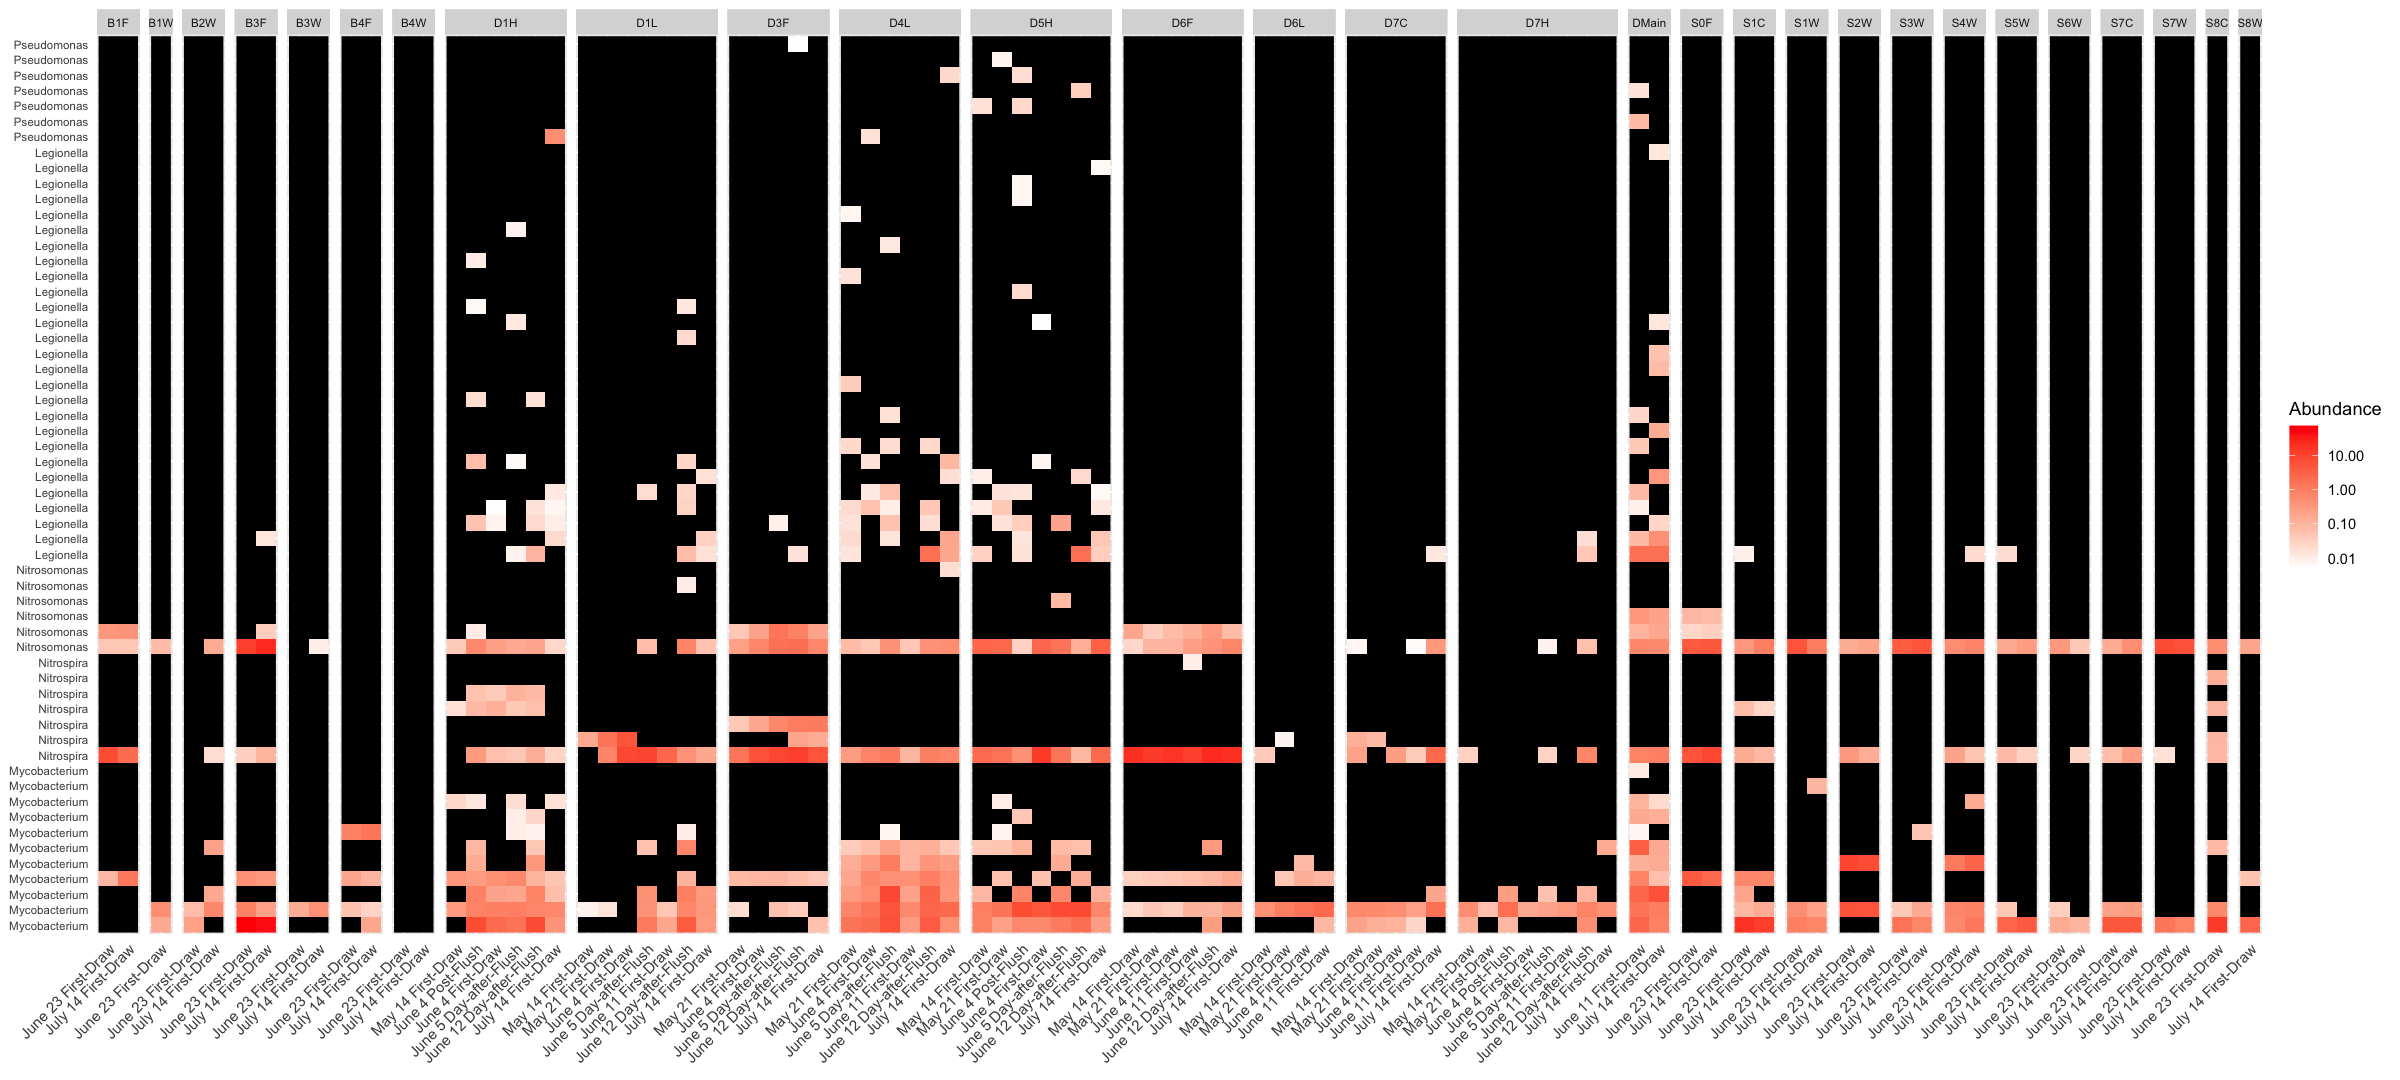

In [69]:
# ps_OP = subset_samples(ps_OP, !(sample_name %in% which(rowSums(otu_table(ps_OP))==0)))

options(repr.plot.width = 20, repr.plot.height = 9)
plot_heatmap(ps_OP, taxa.label = "Genus", sample.label = "date_formal",  method=NULL, taxa.order= "Genus", 
        low="white", high="red", na.value="black", trans = log_trans(10))+
     theme(axis.text.y = element_text(size=7), 
           axis.title.y = element_blank(), 
           axis.title.x = element_blank(), 
           axis.ticks = element_blank(),
           strip.text.x = element_text(size = 7),
           axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=9))+
     facet_grid(.~tap_code, scale="free_x", space="free_x")

ggsave(paste0(fig_dir, 'FigureS14.jpeg'), width=20, height=9)

## Bioenv analysis

In [106]:
#cca with environmental variables following example
#https://github.com/joey711/phyloseq/issues/274

In [73]:
#use bioenv function in vegan package to select variables for cca

ps_perc_cca <- microbiome::transform(ps_perc, transform='clr')
sample_info = as((sample_data(ps_perc_cca)), "data.frame")


ord.fit <- bioenv(otu_table(ps_perc_cca) ~  DO +pH+ cl_total + Mn + Fe + Zn+ TOC.ppm + temp + conductivity + Cu + NH4_avg + nitrate_avg + cl_free , sample_info, index= "euclidean", metric= "euclidean")
ord.fit
summary(ord.fit)


8191 possible subsets (this may take time...)



Call:
bioenv(formula = otu_table(ps_perc_cca) ~ DO + pH + cl_total +      Mn + Fe + Zn + TOC.ppm + temp + conductivity + Cu + NH4_avg +      nitrate_avg + cl_free, data = sample_info, index = "euclidean",      metric = "euclidean") 

Subset of environmental variables with best correlation to community data.

Correlations:    spearman 
Dissimilarities: euclidean 
Metric:          euclidean 

Best model has 8 parameters (max. 13 allowed):
DO pH cl_total Mn Fe conductivity Cu NH4_avg
with correlation  0.3041743 


                                                                                 size
cl_total                                                                            1
cl_total Fe                                                                         2
pH cl_total Fe                                                                      3
pH cl_total Mn Fe                                                                   4
pH cl_total Mn Fe Cu                                                                5
pH cl_total Mn Fe conductivity Cu                                                   6
pH cl_total Mn Fe conductivity Cu NH4_avg                                           7
DO pH cl_total Mn Fe conductivity Cu NH4_avg                                        8
DO pH cl_total Mn Fe Zn conductivity Cu NH4_avg                                     9
DO pH cl_total Mn Fe Zn temp conductivity NH4_avg nitrate_avg                      10
DO pH cl_total Mn Fe Zn temp conductivity Cu NH4_avg n

for all samples

In [74]:
ps_perc_cca <- prune_samples(!is.na(sample_data(ps_perc_cca)$Cu), ps_perc_cca)
# ps_perc_cca <- prune_samples(!is.na(sample_data(ps_perc_cca)$Mn), ps_perc_cca)
# ps_perc_cca <- prune_samples(!is.na(sample_data(ps_perc_cca)$Fe), ps_perc_cca)
ps_perc_cca <- prune_samples(!is.na(sample_data(ps_perc_cca)$pH), ps_perc_cca)
ps_perc_cca <- prune_samples(!is.na(sample_data(ps_perc_cca)$cl_total), ps_perc_cca)
# ps_perc_cca <- prune_samples(!is.na(sample_data(ps_perc_cca)$ICC), ps_perc_cca)
# ps_perc_cca <- prune_samples(!is.na(sample_data(ps_perc_cca)$NH4_avg), ps_perc_cca)
ps_perc_cca <- prune_samples(!is.na(sample_data(ps_perc_cca)$DO), ps_perc_cca)

ps.cca = ordinate(ps_perc_cca, formula=ps_perc_cca ~ cl_total   +  pH  + Cu + DO  , na.rm= TRUE , method= "RDA", distance= "euclidean")
# ps.cca


sample_info = as((sample_data(ps_perc_cca)), "data.frame")
ord.p <- envfit(ps.cca ~  cl_total   +  pH  + Cu + DO, na.rm= TRUE, data=sample_info, perm=1000)
ord.p


***VECTORS

             RDA1     RDA2     r2   Pr(>r)    
cl_total  0.99156  0.12966 0.6699 0.000999 ***
pH        0.73602 -0.67696 0.5660 0.000999 ***
Cu       -0.76683  0.64185 0.1176 0.007992 ** 
DO        0.90042 -0.43502 0.6023 0.000999 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 1000



# PCA for aitchison compositions
https://search.r-project.org/CRAN/refmans/compositions/html/princompacomp.html

In [75]:

# install.packages("compositions")
# library("compositions")
# pc <- princomp(acomp(ps_perc))

## PCA of environmental variables

In [76]:
#followed instructions here https://www.datacamp.com/community/tutorials/pca-analysis-r

# df_env <- as.data.frame(sample_data(ps))
mat <- as(sample_data(ps), "matrix")
df_env <- as.data.frame(mat)

# trim down df to just columns that we want to input to the PCA
keep= c( "sample_name", "building", "fixture_type", "date_cat", "tap_code",  "flush", "DO", "ICC", "pH", "cl_total" , "Mn" , "Fe" , "Zn", "TOC.ppm" , "temp" ,"conductivity" , "Cu" , "NH4_avg" ,"nitrate_avg" , "cl_free") #be careful not to add variables we're not using here because we'll lose data
df_pca <- df_env  %>% select(keep) %>% drop_na() %>%
mutate(`pH` = as.numeric(`pH`)) %>%
mutate(`cl_total` = as.numeric(`cl_total`)) %>%
mutate(`temp` = as.numeric(`temp`)) %>%
mutate(`DO` = as.numeric(`DO`)) %>%
mutate(`Mn` = as.numeric(`Mn`)) %>%
mutate(`Cu` = as.numeric(`Cu`)) %>%
mutate(`Fe` = as.numeric(`Fe`)) %>%
mutate(`Zn` = as.numeric(`Zn`)) %>%
mutate(`TOC.ppm` = as.numeric(`TOC.ppm`)) %>%
mutate(`conductivity` = as.numeric(`conductivity`)) %>%
mutate(`ICC` = as.numeric(`ICC`)) %>%
mutate(`cl_free` = as.numeric(`cl_free`)) %>%
mutate(`NH4_avg` = as.numeric(`NH4_avg`)) %>%
mutate(`nitrate_avg` = as.numeric(`nitrate_avg`)) 
#   dplyr::rename("Temp"="temp_c") %>%
#   dplyr::rename("Chlor(mg/L)" = "cl_tot_clean") %>%
#   dplyr::rename("Legio(MPN/100mL)"="legiolert_mpn100ml") %>%
#   dplyr::rename("Disinfectant"= "disinfectant") %>%
#   dplyr::rename("#Floors" = "tot_floors") %>%
#   dplyr::rename("Bldg_Age"="building_age") %>%
#   dplyr::rename("Bldg_ID"="building_id")

# keep.pca <- c("pH",  "temp","cl_total", "DO", "Mn", "Cu")
keep.pca <- c( "DO", "ICC", "pH", "cl_total" , "Mn" , "Fe" , "Zn", "TOC.ppm" , "temp" ,"conductivity" , "Cu" , "NH4_avg" ,"nitrate_avg" , "cl_free")
df.pca <- prcomp(df_pca[keep.pca], center= TRUE, scale.=TRUE)
summary(df.pca)

# df_pca


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(keep)` instead of `keep` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.9679 1.4803 1.3155 1.16691 1.08115 0.93300 0.87735
Proportion of Variance 0.2766 0.1565 0.1236 0.09726 0.08349 0.06218 0.05498
Cumulative Proportion  0.2766 0.4331 0.5567 0.65401 0.73750 0.79968 0.85466
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.73914 0.69124 0.60048 0.53774 0.47718 0.33592 0.14269
Proportion of Variance 0.03902 0.03413 0.02576 0.02065 0.01626 0.00806 0.00145
Cumulative Proportion  0.89368 0.92781 0.95357 0.97422 0.99049 0.99855 1.00000

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



pdf 
  2

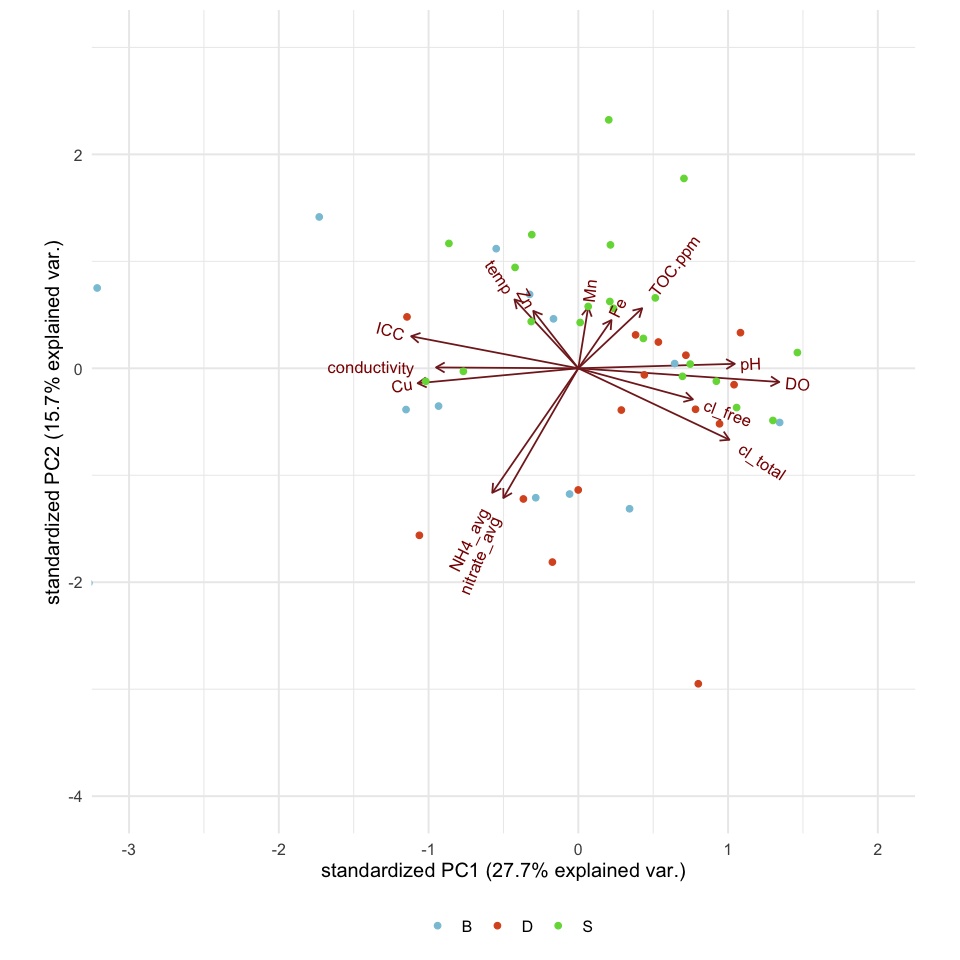

In [77]:
options(repr.plot.width = 8, repr.plot.height = 8)
pca_site <- ggbiplot(df.pca, choices= c(1,2), ellipse=F, groups= df_pca$building, labels.size = 6, varname.size = 3.5)+
 scale_color_manual(values = colors)+
  theme_minimal(base_size=12)+
  theme(legend.position= "bottom", axis.title = element_text(size = 12), aspect.ratio = 1, legend.title = element_blank())+
  coord_cartesian(ylim=c(-4,3), xlim=c(-3,2))
pca_site
png("pca_site.png", units = "in", width=5, height=5, res=300)
print(pca_site)
dev.off()

In [78]:
# does water quality cluster by tap_code as well?

#Normalized by percent
# sample_info = as((sample_data(ps_perc)), "data.frame")

bulk_eucl = vegdist((df_pca[keep.pca]), method= "euclidean")


bulk_adonis = adonis(bulk_eucl ~ building +date_cat  + tap_code + fixture_type, df_pca)
bulk_adonis

# one.way <- aov(yield ~ fertilizer, data = df_pca[keep.pca])
# summary(one.way)



Call:
adonis(formula = bulk_eucl ~ building + date_cat + tap_code +      fixture_type, data = df_pca) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df  SumsOfSqs    MeanSqs F.Model      R2 Pr(>F)   
building      2 7.2650e+11 3.6325e+11 18.3959 0.27180  0.002 **
date_cat      5 4.1952e+10 8.3904e+09  0.4249 0.01570  0.732   
tap_code     23 1.5653e+12 6.8058e+10  3.4467 0.58564  0.044 * 
fixture_type  1 3.3873e+09 3.3873e+09  0.1715 0.00127  0.610   
Residuals    17 3.3568e+11 1.9746e+10         0.12559          
Total        48 2.6729e+12                    1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Repeat PCA with just significant bioenv variables

In [79]:
mat <- as(sample_data(ps), "matrix")
df_env <- as.data.frame(mat)

# trim down df to just columns that we want to input to the PCA
keep= c( "sample_name", "building", "fixture_type", "date_cat", "tap_code",  "flush",  "DO", "pH", "cl_total" ,  "Cu" ) #be careful not to add variables we're not using here because we'll lose data
df_pca <- df_env  %>% select(keep) %>% drop_na() %>%
mutate(`pH` = as.numeric(`pH`)) %>%
mutate(`cl_total` = as.numeric(`cl_total`)) %>%
# mutate(`Mn` = as.numeric(`Mn`)) %>%
mutate(`Cu` = as.numeric(`Cu`)) %>%
# mutate(`Fe` = as.numeric(`Fe`)) %>%
# mutate(`conductivity` = as.numeric(`conductivity`)) %>%
mutate(`DO` = as.numeric(`DO`)) %>%
# mutate(`NH4_avg` = as.numeric(`NH4_avg`)) %>%
  dplyr::rename("pH\n"="pH")  %>%
  dplyr::rename("DO" = "DO")%>%
  dplyr::rename("Total chlorine"="cl_total")
#   dplyr::rename("NH4"= "NH4_avg") %>%
#   dplyr::rename("Conductivity" = "conductivity")
#   dplyr::rename("Bldg_Age"="building_age") %>%
#   dplyr::rename("Bldg_ID"="building_id")

# keep.pca <- c("pH",  "temp","cl_total", "DO", "Mn", "Cu")
keep.pca <- c("DO", "pH\n", "Total chlorine" ,  "Cu" )
df.pca <- prcomp(df_pca[keep.pca], center= TRUE, scale.=TRUE)
summary(df.pca)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.6001 0.8795 0.6403 0.50627
Proportion of Variance 0.6401 0.1934 0.1025 0.06408
Cumulative Proportion  0.6401 0.8334 0.9359 1.00000

In [80]:
df.pca

Standard deviations (1, .., p=4):
[1] 1.6000671 0.8794616 0.6403283 0.5062730

Rotation (n x k) = (4 x 4):
                      PC1        PC2        PC3        PC4
DO              0.5644616 -0.0884478  0.1905292 -0.7982849
pH\n            0.5396634  0.1253700  0.6481811  0.5224050
Total chlorine  0.4372010 -0.7253145 -0.4509039  0.2818860
Cu             -0.4460961 -0.6711022  0.5833057 -0.1018557

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



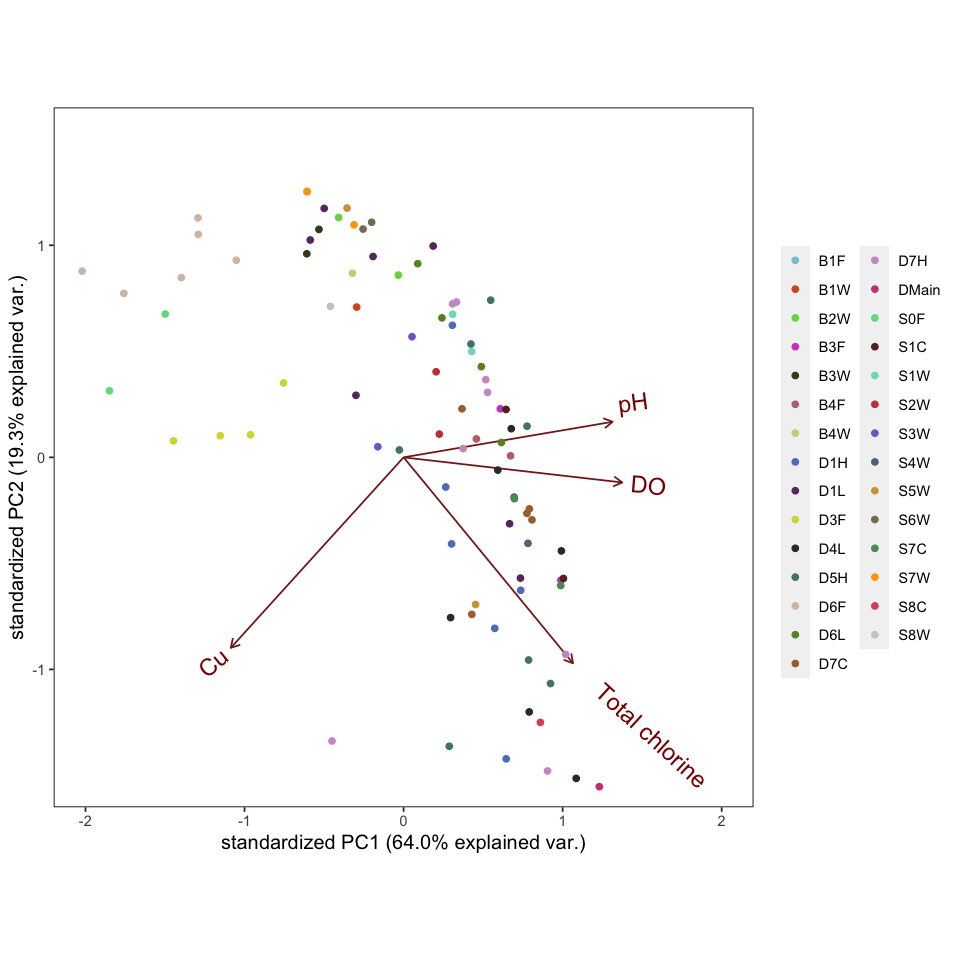

In [81]:

options(repr.plot.width = 8, repr.plot.height = 8)
pca_env <- ggbiplot(df.pca, choices= c(1,2), ellipse=F, groups= df_pca$tap_code,  labels.size = 6, varname.size = 5, arrow.color = "#000000", loadings.label.color = "#000000",  label.colour = "#000000")+
 scale_color_manual(values = colors)+
#   theme_minimal(base_size=12)+
#   stat_ellipse(type = "t", linetype = 1, aes(group= df_pca$building)) +
  theme(legend.position= "right", axis.title = element_text(size = 12), aspect.ratio = 1, legend.title = element_blank(), panel.background=element_blank(), panel.border=element_rect(color = "#000000", fill = NA))+
  coord_cartesian(ylim=c(-1.5,1.5), xlim=c(-2,2))
pca_env


In [82]:
bulk_eucl = vegdist((df_pca[keep.pca]), method= "euclidean")


bulk_adonis = adonis(bulk_eucl ~ building +date_cat  + tap_code + fixture_type + flush, df_pca)
bulk_adonis



Call:
adonis(formula = bulk_eucl ~ building + date_cat + tap_code +      fixture_type + flush, data = df_pca) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
building      2     41155 20577.4  32.568 0.08236  0.003 ** 
date_cat      8      4407   550.9   0.872 0.00882  0.533    
tap_code     26    419930 16151.1  25.562 0.84041  0.001 ***
fixture_type  1       696   695.9   1.101 0.00139  0.128    
Residuals    53     33487   631.8         0.06702           
Total        90    499675                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## plot cca of communities using the bioenv subset

## plot RDA

In [83]:
ps_perc_clr <- microbiome::transform(ps_perc, transform='clr')

# ps_perc_nof <- prune_samples(!is.na(sample_data(ps_perc_clr)$Mn), ps_perc_clr)
# ps_perc_nof <- prune_samples(!is.na(sample_data(ps_perc_nof)$Fe), ps_perc_nof)
ps_perc_clr <- prune_samples(!is.na(sample_data(ps_perc_clr)$Cu), ps_perc_clr)
# ps_perc_nof <- prune_samples(!is.na(sample_data(ps_perc_nof)$conductivity), ps_perc_nof)
# ps_perc_nof <- prune_samples(!is.na(sample_data(ps_perc_nof)$NH4_avg), ps_perc_nof)
ps_perc_clr <- prune_samples(!is.na(sample_data(ps_perc_clr)$DO), ps_perc_clr)

# colnames(sample_data(ps_perc_nof))[which(names(sample_data(ps_perc_nof)) == "cl_total")] <- "Total Chlorine"
# colnames(sample_data(ps_perc_nof))[which(names(sample_data(ps_perc_nof)) == "cl_total")] <- "Total Chlorine"
# colnames(sample_data(ps_perc_nof))[which(names(sample_data(ps_perc_nof)) == "cl_total")] <- "Total Chlorine"
# colnames(sample_data(ps_perc_nof))[which(names(sample_data(ps_perc_nof)) == "cl_total")] <- "Total Chlorine"
# colnames(sample_data(ps_perc_nof))[which(names(sample_data(ps_perc_nof)) == "cl_total")] <- "Total Chlorine"
# df_pca <- ps_perc_nof  %>% 
#   dplyr::rename("pH\n"="pH")  %>%
#   dplyr::rename("\nDO" = "DO")%>%
#   dplyr::rename("Total chlorine"="cl_total")  %>%
#   dplyr::rename("NH4"= "NH4_avg") %>%
#   dplyr::rename("Conductivity" = "conductivity")

ps.cca = ordinate(ps_perc_clr, formula=ps_perc_clr ~ cl_total + pH +  Cu + DO  , na.rm= TRUE , method= "RDA", distance= "euclidean")
ps.cca

# colnames(sample_data(ps_perc))

Call: rda(formula = OTU ~ cl_total + pH + Cu + DO, data = data)

                Inertia Proportion Rank
Total         1153.6754     1.0000     
Constrained    194.5940     0.1687    4
Unconstrained  959.0814     0.8313   86
Inertia is variance 

Eigenvalues for constrained axes:
 RDA1  RDA2  RDA3  RDA4 
95.66 55.71 23.27 19.95 

Eigenvalues for unconstrained axes:
  PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8 
90.10 81.57 69.22 59.47 53.37 46.39 43.91 38.85 
(Showing 8 of 86 unconstrained eigenvalues)


In [84]:
ps.cca

Call: rda(formula = OTU ~ cl_total + pH + Cu + DO, data = data)

                Inertia Proportion Rank
Total         1153.6754     1.0000     
Constrained    194.5940     0.1687    4
Unconstrained  959.0814     0.8313   86
Inertia is variance 

Eigenvalues for constrained axes:
 RDA1  RDA2  RDA3  RDA4 
95.66 55.71 23.27 19.95 

Eigenvalues for unconstrained axes:
  PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8 
90.10 81.57 69.22 59.47 53.37 46.39 43.91 38.85 
(Showing 8 of 86 unconstrained eigenvalues)


In [85]:
p0 = plot_ordination(ps_perc_clr, ps.cca, type = "samples", color = "tap_code") + #, shape = "flush"
geom_point(size=2)+
#     scale_shape_manual(values=c(7,19,17, 5),
#                        name="Flush",
#                        labels=c("D", "BC", "SB"))+
    scale_color_manual(values = colors,
                       name="Fixture ID")+
    theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
# ggsave('~/scientific_work/Nelson_lab/sandiego/dpwf_NMDS.pdf', device='pdf', width = 4, height = 2.5)

# Now add the environmental variables as arrows
arrowmat = vegan::scores(ps.cca, display = "bp")
rownames(arrowmat)[which(rownames(arrowmat) == "cl_total")] <- "                      Total Chlorine"
rownames(arrowmat)[which(rownames(arrowmat) == "DO")] <- "       DO"
rownames(arrowmat)[which(rownames(arrowmat) == "pH")] <- "      pH"
rownames(arrowmat)[which(rownames(arrowmat) == "Cu")] <- "Cu       "
rownames(arrowmat)[which(rownames(arrowmat) == "conductivity")] <- "Conductivity"
rownames(arrowmat)[which(rownames(arrowmat) == "NH4_avg")] <- "NH4"

# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map = aes(xend = 3*RDA1, yend = 3*RDA2, x = 0, y = 0, shape = NULL, color = NULL, 
    label = labels)
label_map = aes(x = 3 * RDA1, y = 3 * RDA2, shape = NULL, color = NULL, 
    label = labels)
# Make a new graphic
arrowhead = arrow(length = unit(0.05, "npc"))

p1 = p0 + geom_segment(arrow_map, size = 0.5, data = arrowdf, color = "black", 
    arrow = arrowhead) + geom_text(label_map, size = 4, data = arrowdf) +
# stat_ellipse(type = "t", linetype = 1, aes(group= fixture_type)) +
theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
#           axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))


Warning message:
“Ignoring unknown aesthetics: label”


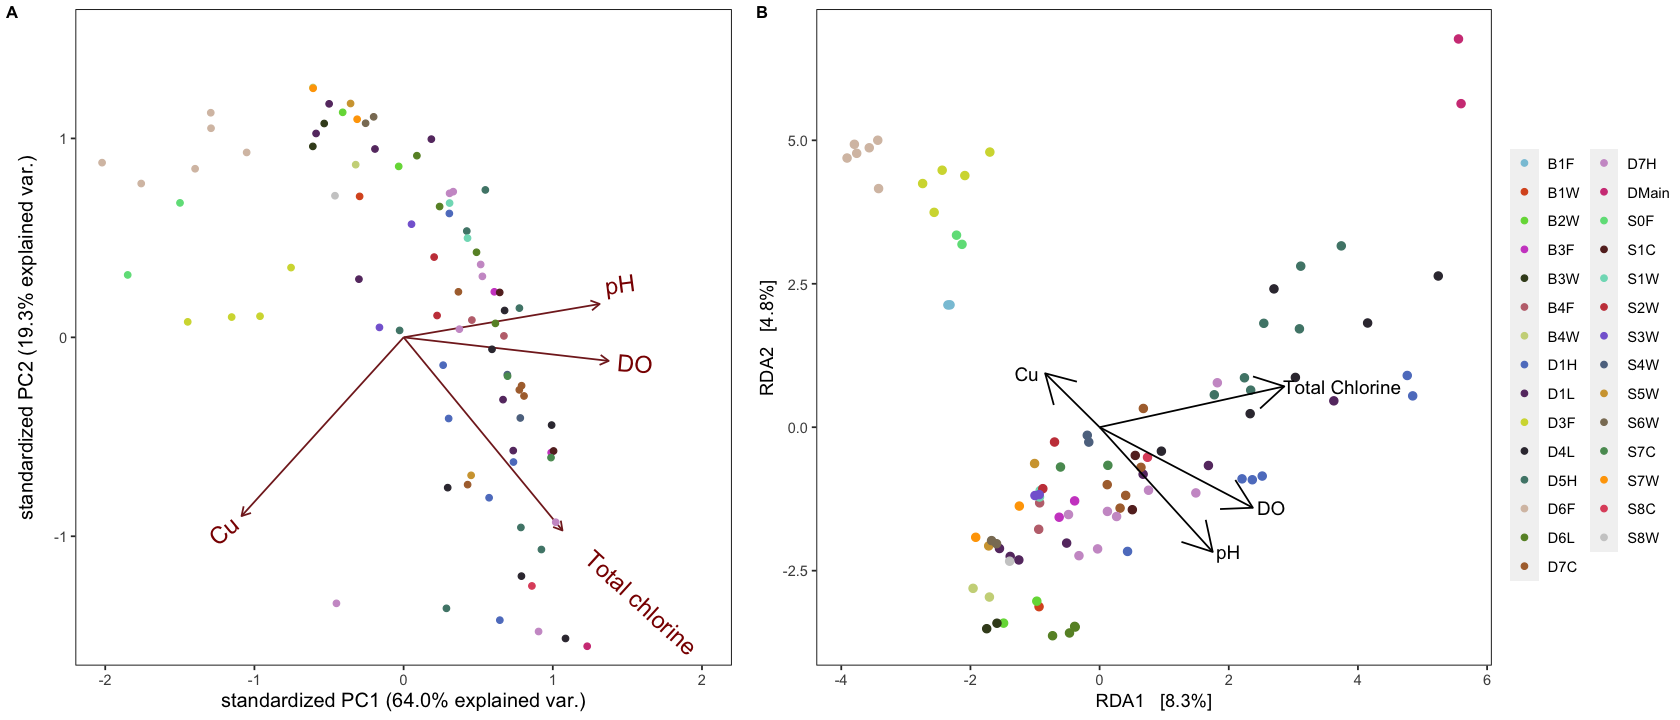

In [86]:
#arrange plots for paper

#p1 is RDA of joint samples and env factors
#p2 is PCA of just environmental factors
#p3 is NMDS of samples 

options(repr.plot.width = 14, repr.plot.height = 6)
ggarrange( pca_env,p1, nrow=1, labels= c("A", "B"), font.label = list(size = 10, color = "black", face = "bold", family = NULL), legend = "right", common.legend = T, align = c("hv"))

ggsave(paste0(fig_dir, 'Figure6.jpeg'), width=14, height=6)